# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  1089k      0 --:--:--  0:13:46 --:--:-- 2564k     0  1096k      0 --:--:--  0:00:03 --:--:-- 1097k 6037k    0     0   756k      0 --:--:--  0:00:07 --:--:--  448k020k    0     0   501k      0 --:--:--  0:00:17 --:--:--  289k10.2M    0     0   437k      0 --:--:--  0:00:23 --:--:--  262k10.7M    0     0   423k      0 --:--:--  0:00:25 --:--:--  290k 13.7M    0     0   390k      0 --:--:--  0:00:35 --:--:--  306k21.8M    0     0   378k      0 --:--:--  0:00:58 --:--:--  466k23.4M    0     0   381k      0 --:--:--  0:01:02 --:--:--  434k 25.3M    0     0   387k      0 --:--:--  0:01:06 --:--:--  471k 26.6M    0     0   384k      0 --:--:--  0:01:10 --:--:--  341k 33.2M    0     0   369k      0 --:--:--  0:01:32 --:--:--  368k34.5M    0     0   368k      0 --:--:--  0:01:35 --:--:--  340k2.6M    0     

In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

The data is provided as a comma separated file.

In [ ]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [ ]:
!ls -lh

We see that we have 5 million datapoints.

In [ ]:
!wc -l SUSY.csv

We create a new file of the first half million. This is sufficient for our needs in this lab:

In [ ]:
!head -500000 SUSY.csv > SUSY-small.csv

In [ ]:
ls -lh

In [ ]:
! wc -l SUSY-small.csv

Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [17]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [4]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [5]:
FeatureNames

['cos_theta_r1',
 'M_TR_2',
 'axial_MET',
 'M_R',
 'MT2',
 'S_R',
 'MET_rel',
 'dPhi_r_b',
 'R',
 'M_Delta_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [19]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [8]:
print(df)

         signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET   

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [20]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


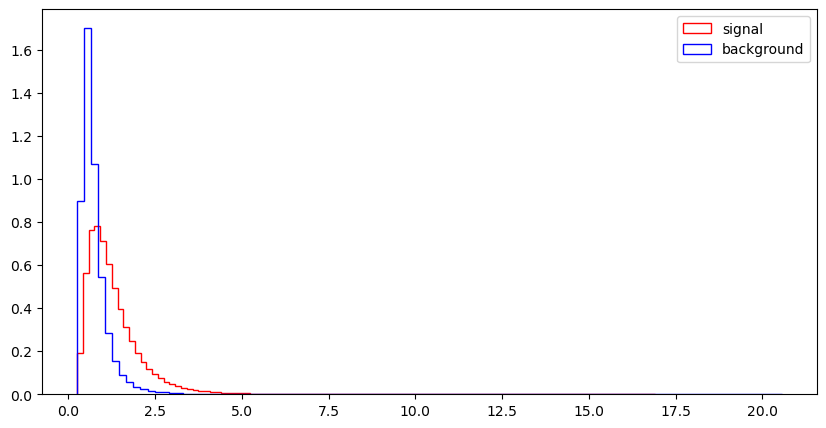

l_1_eta


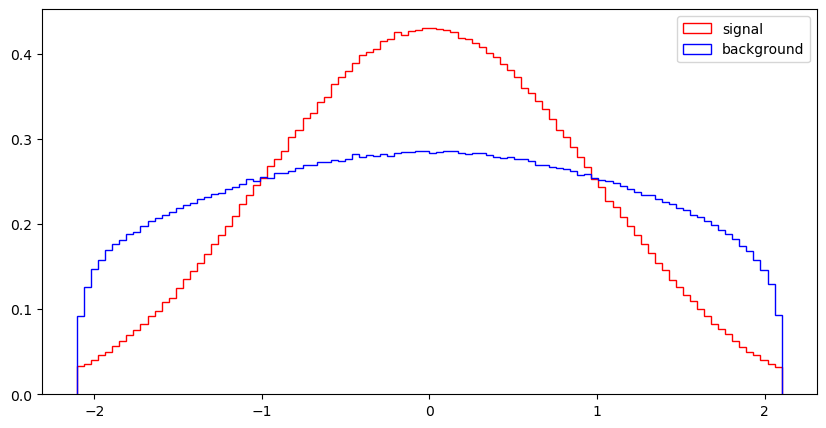

l_1_phi


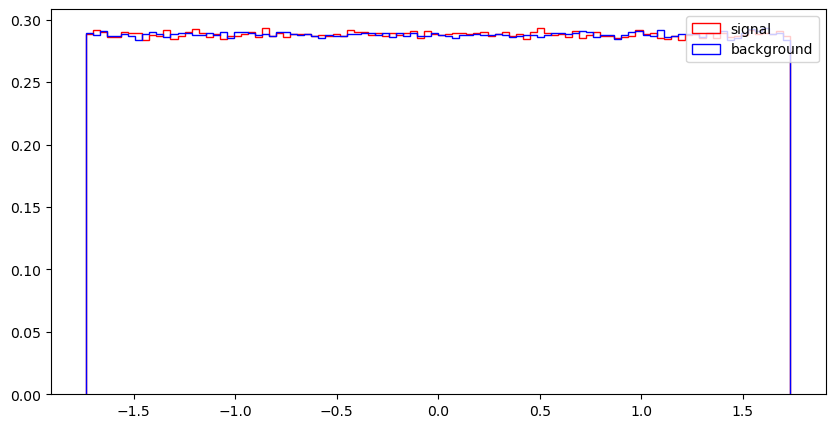

l_2_pT


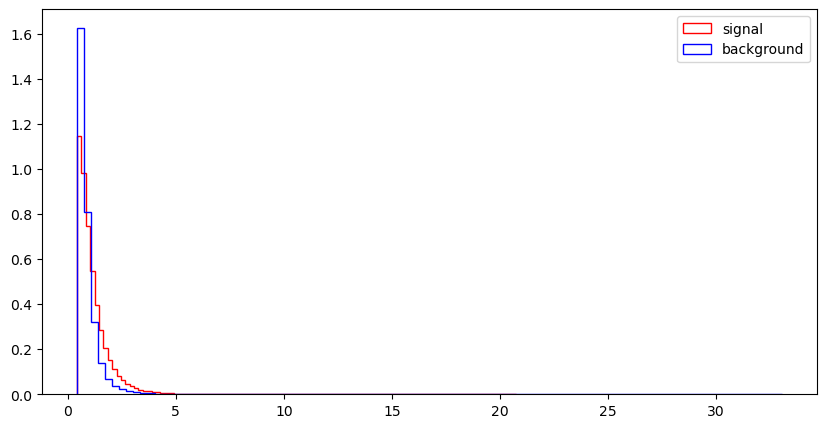

l_2_eta


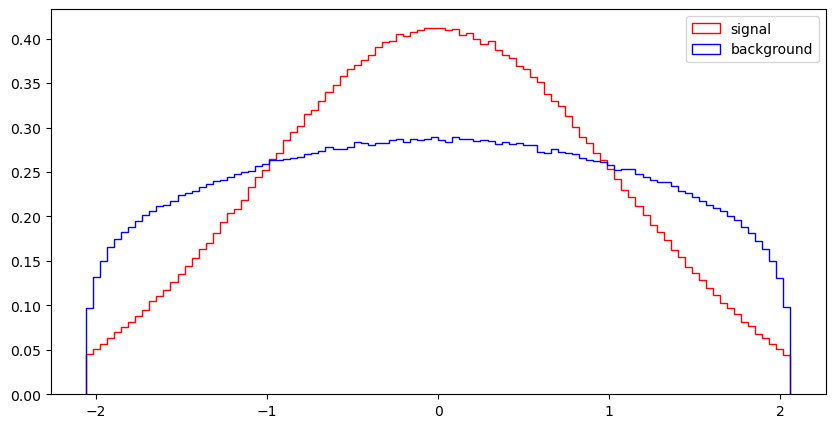

l_2_phi


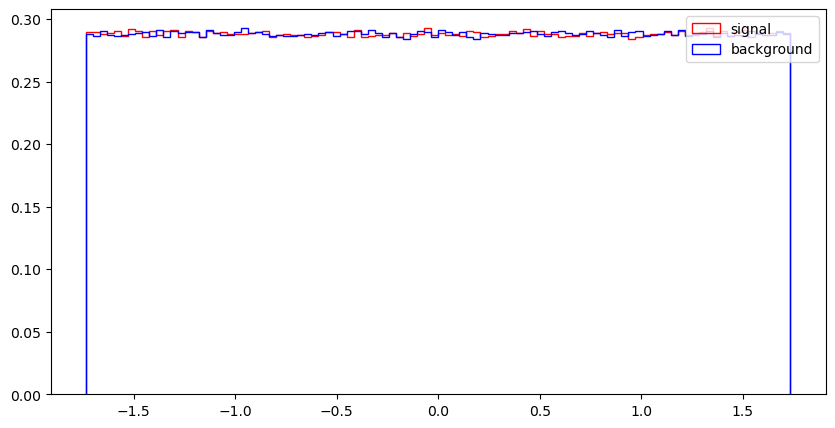

MET


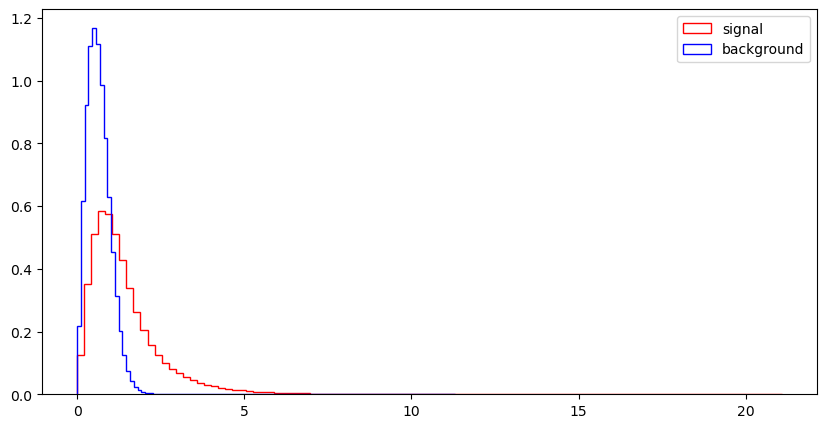

MET_phi


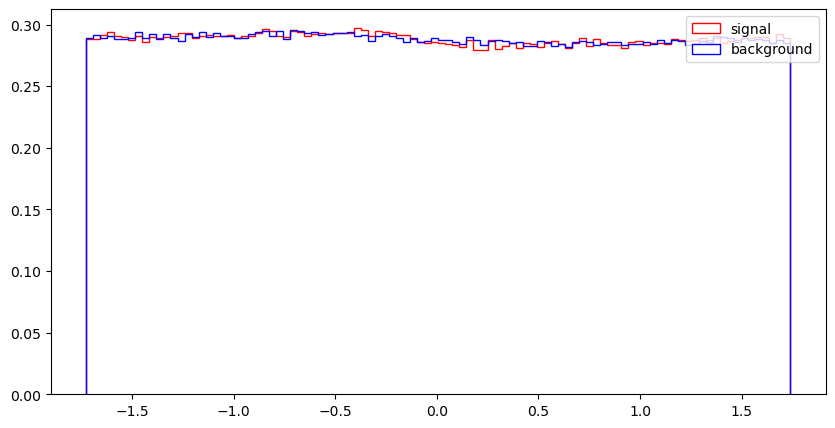

MET_rel


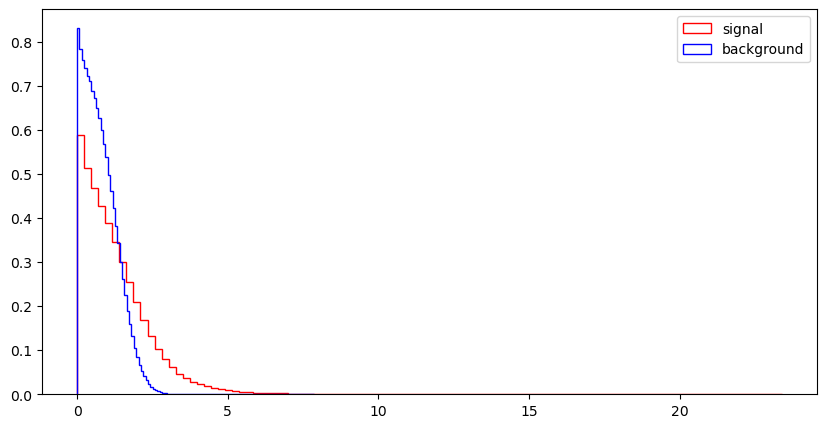

axial_MET


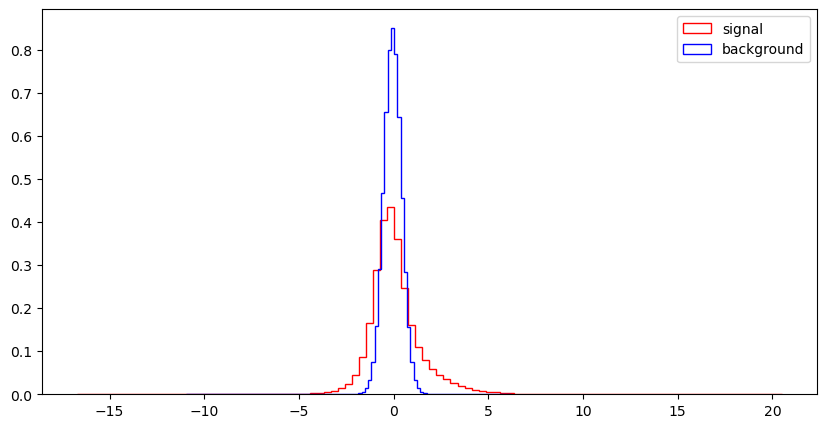

M_R


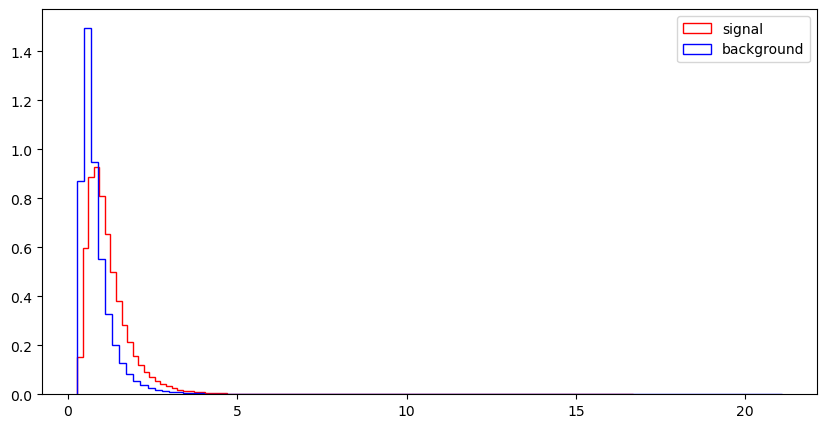

M_TR_2


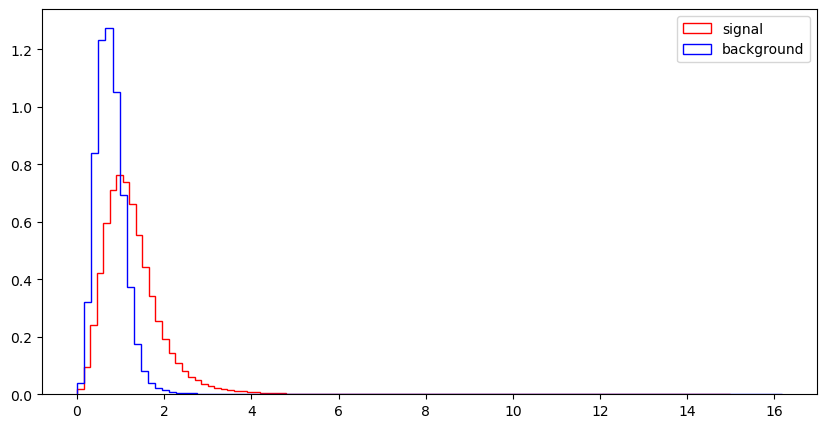

R


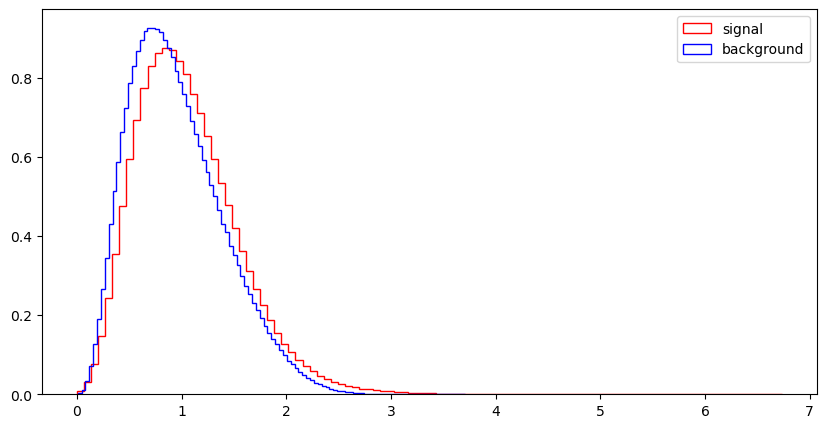

MT2


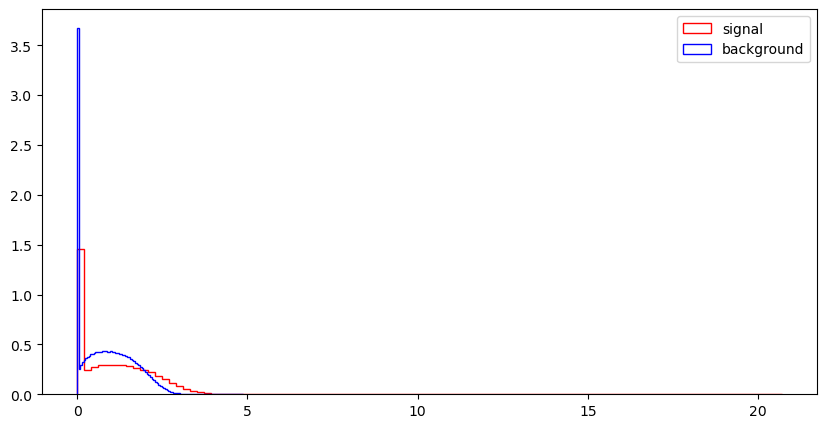

S_R


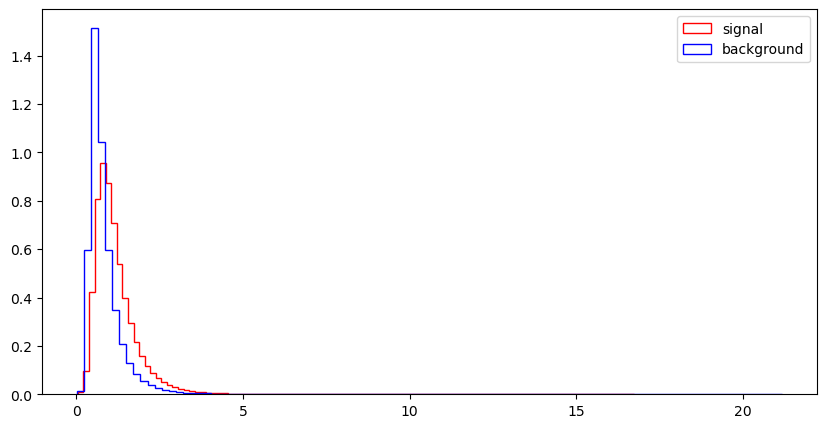

M_Delta_R


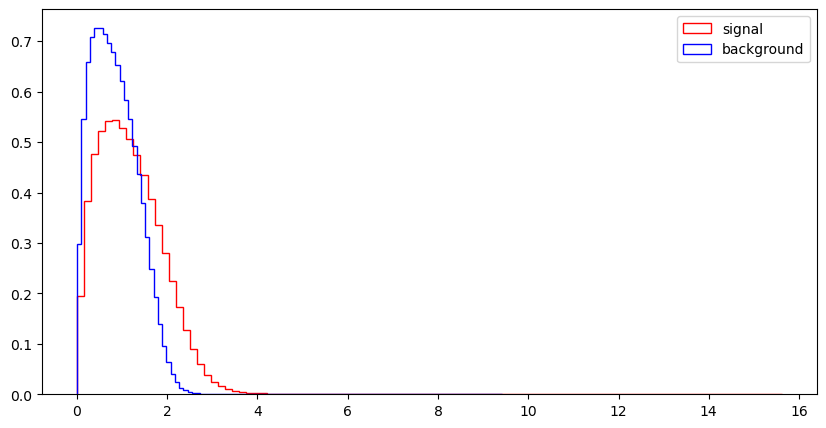

dPhi_r_b


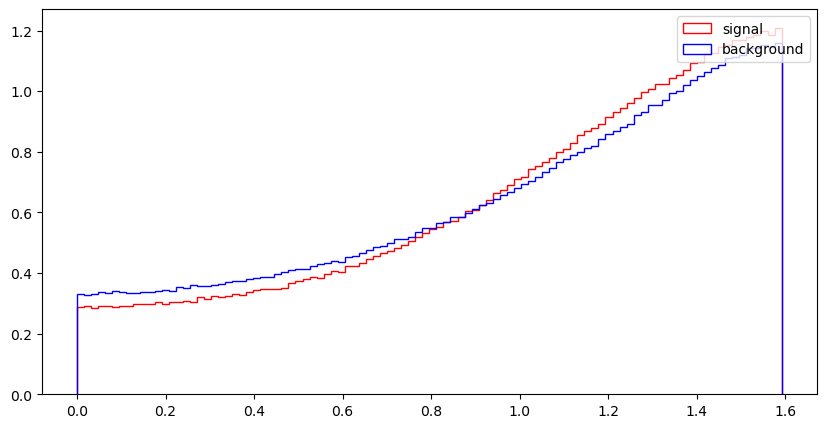

cos_theta_r1


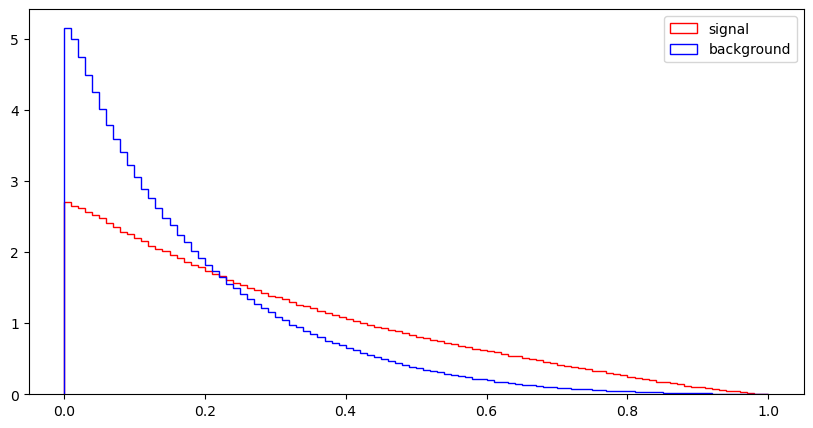

In [21]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [ ]:
##Figures 5 and 6 from what paper?

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

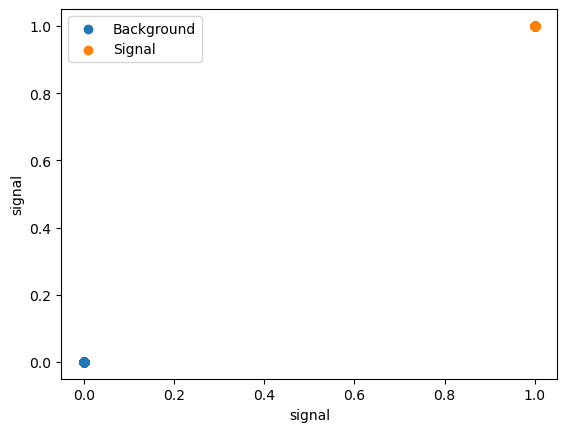

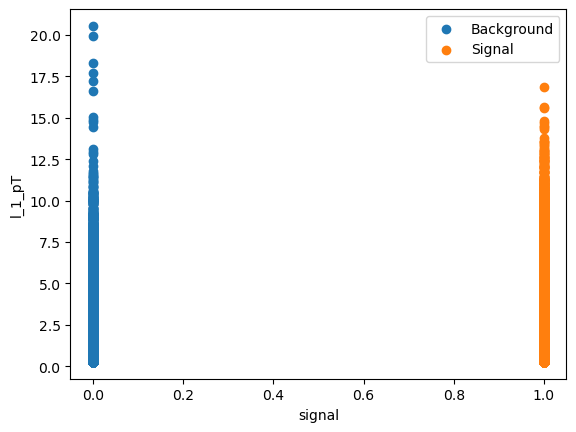

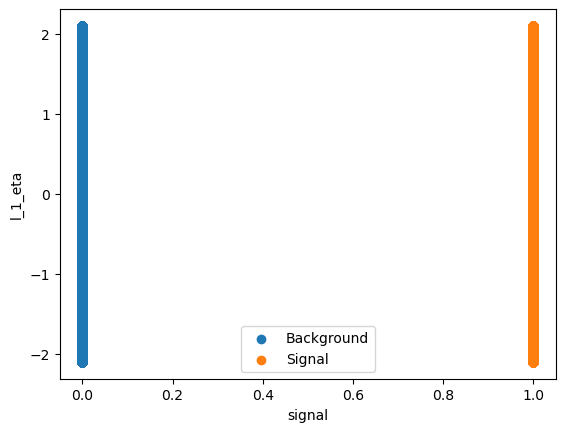

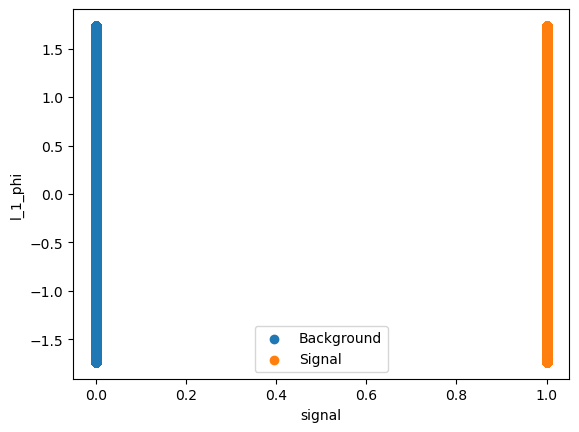

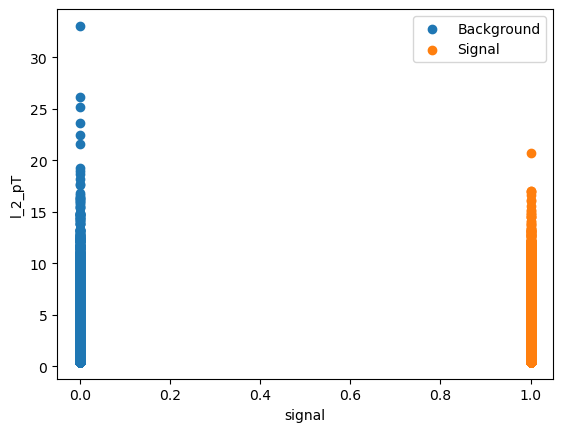

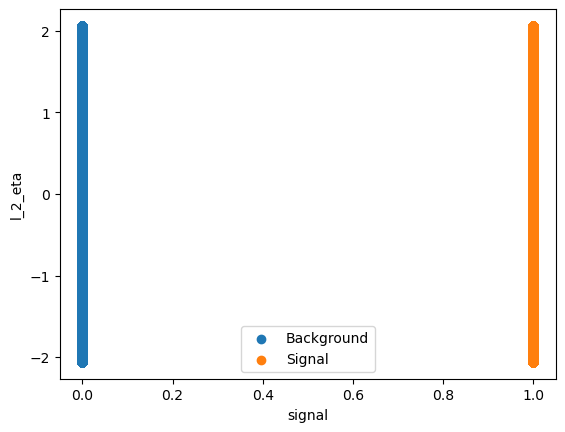

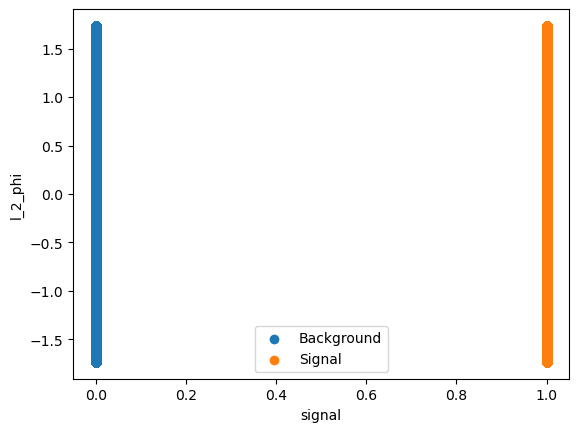

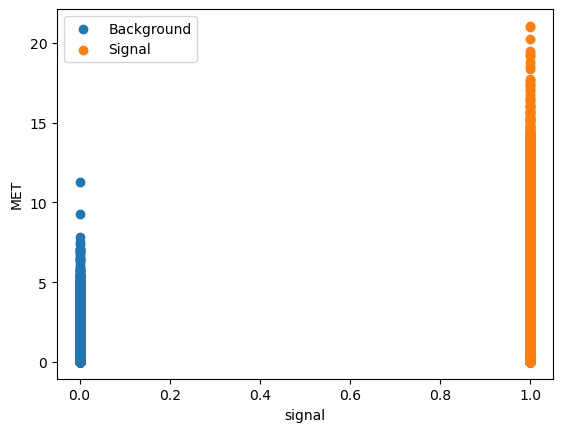

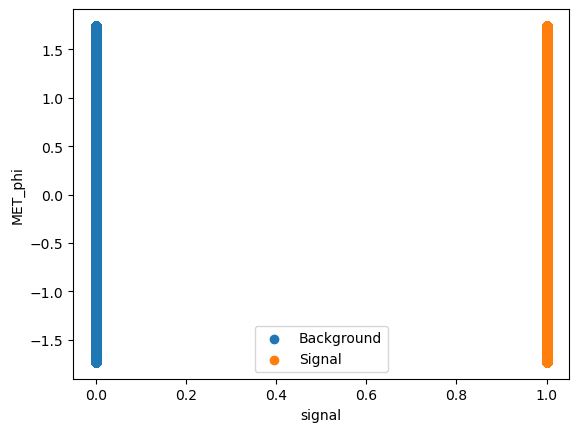

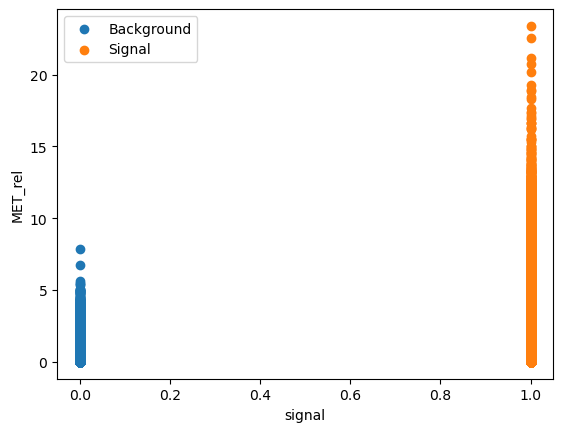

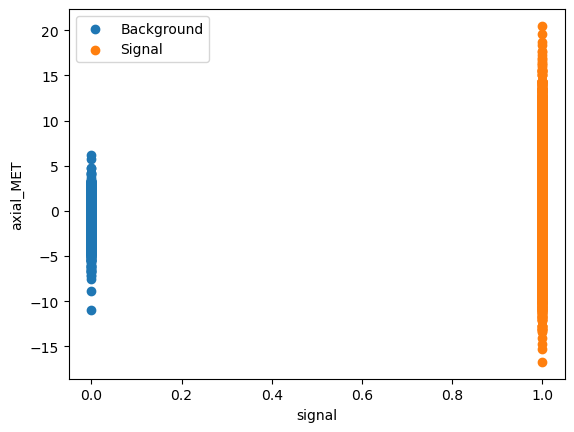

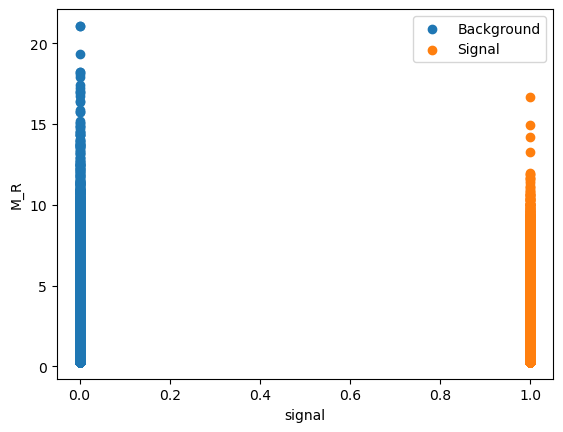

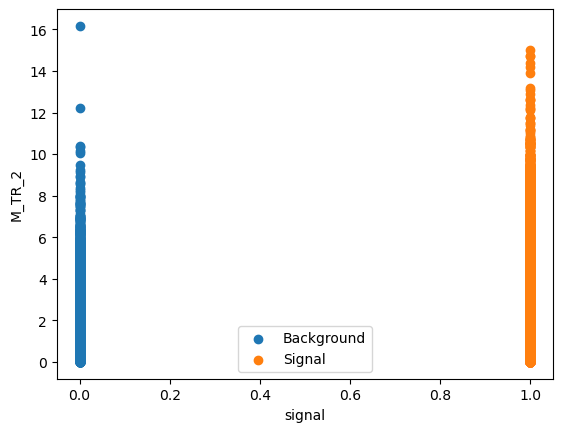

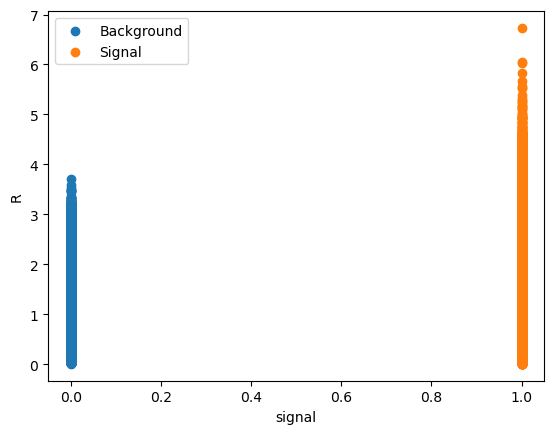

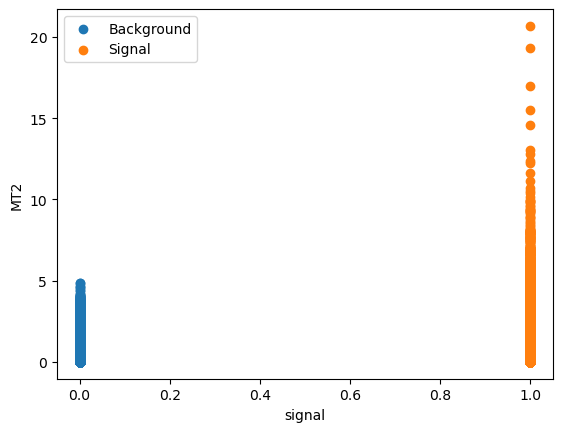

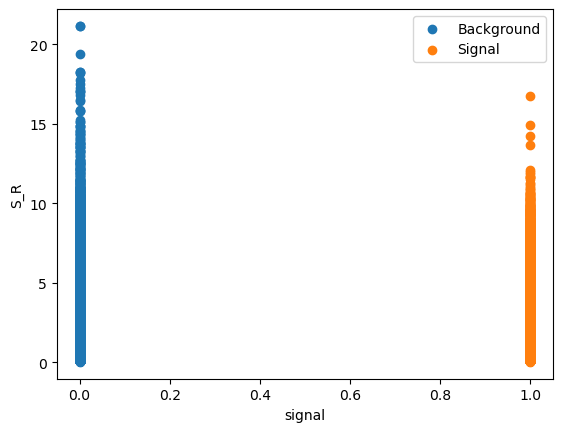

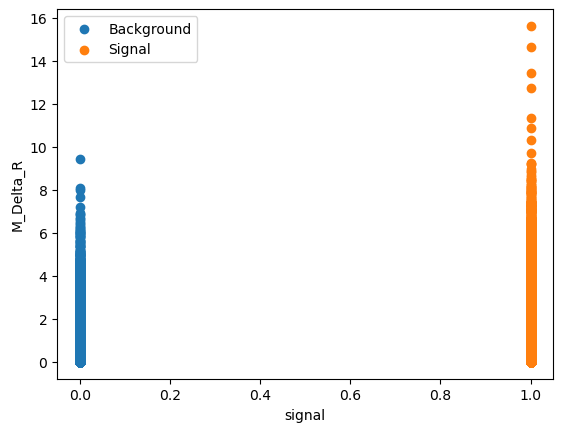

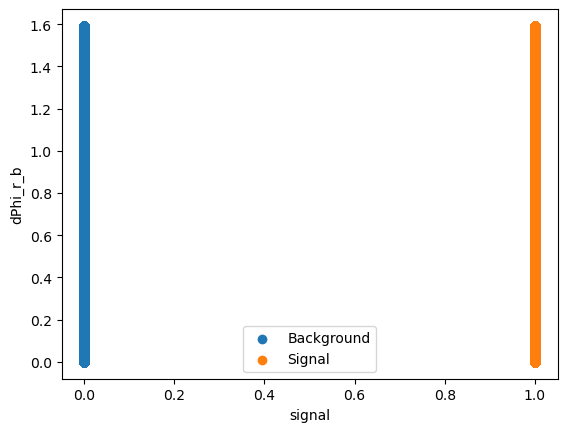

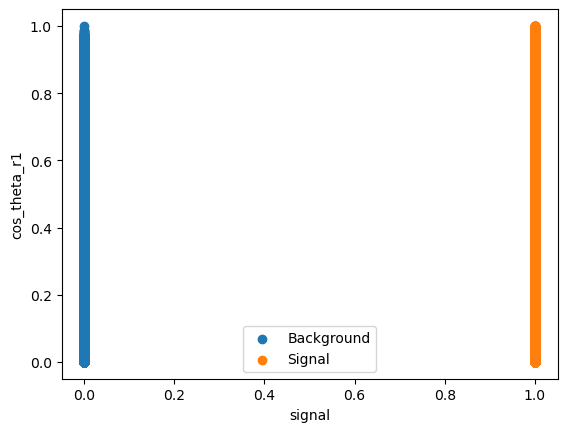

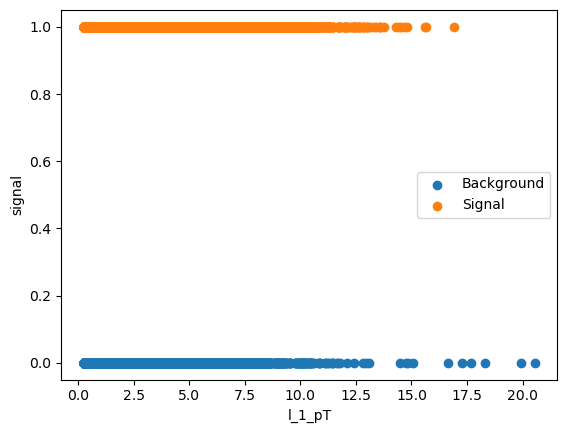

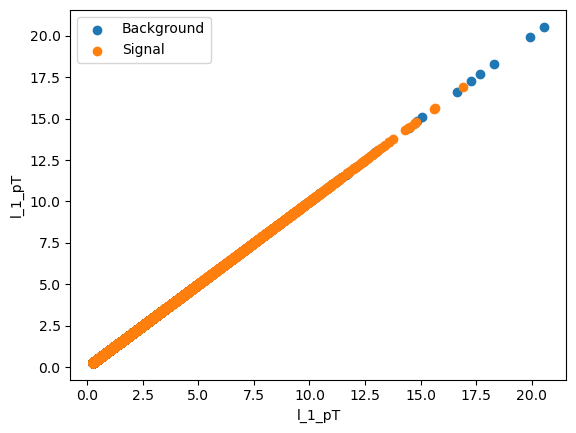

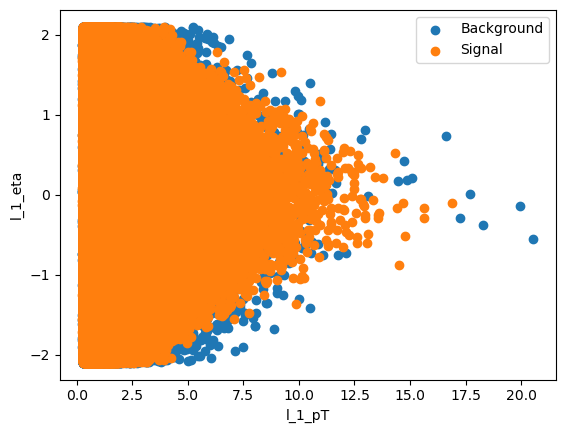

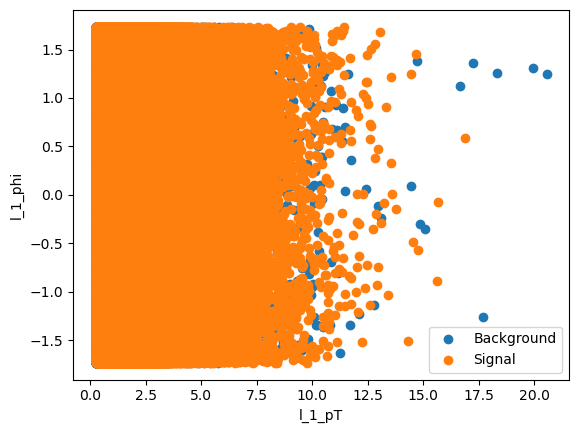

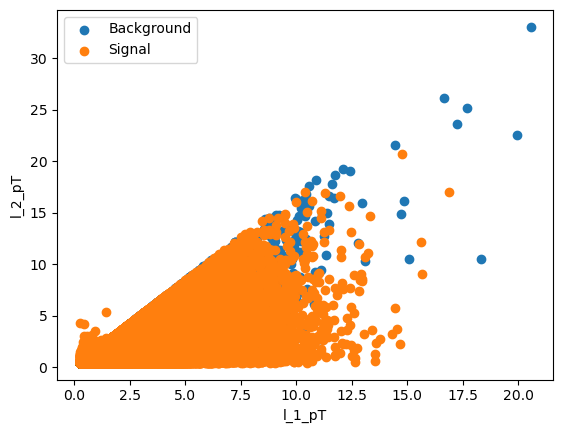

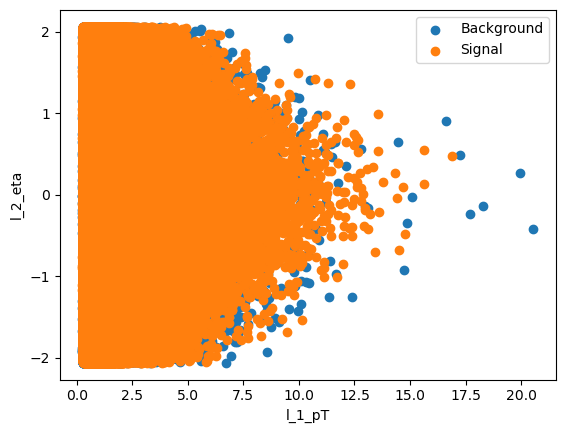

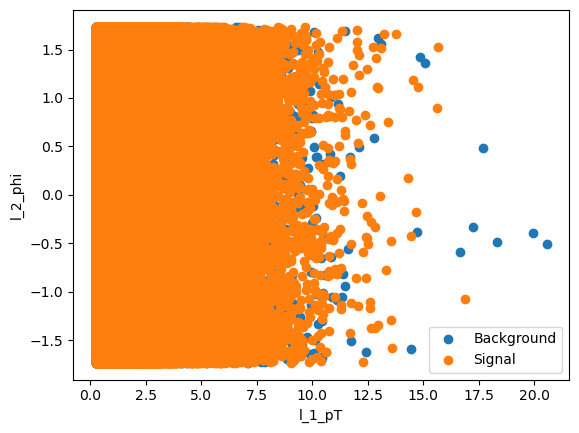

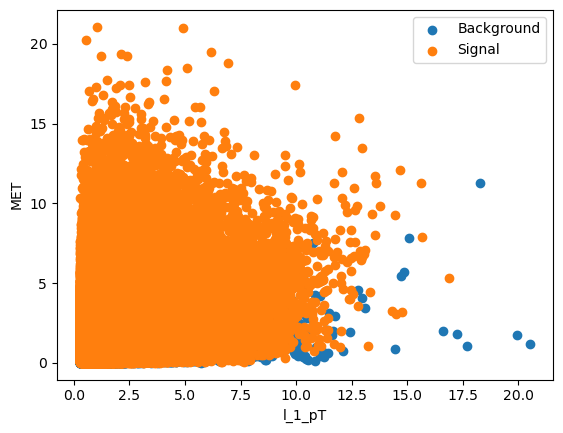

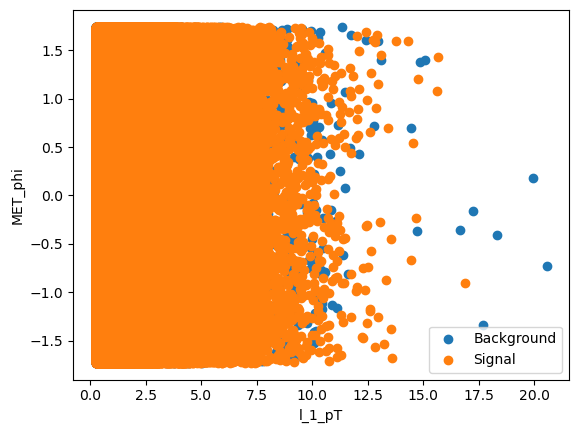

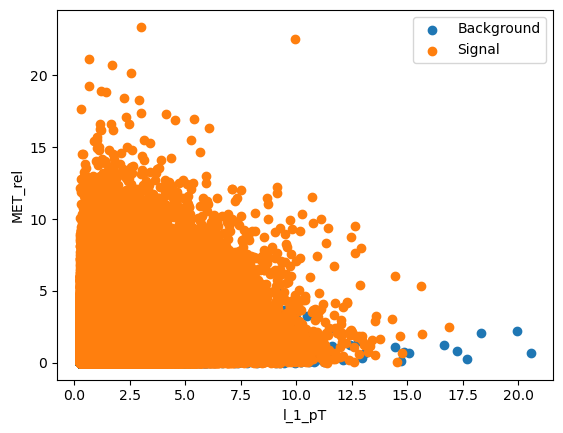

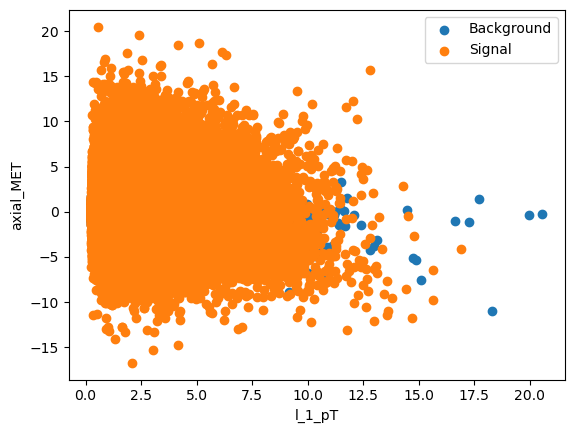

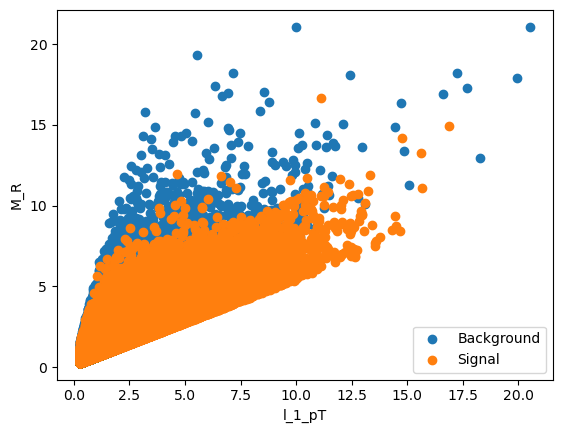

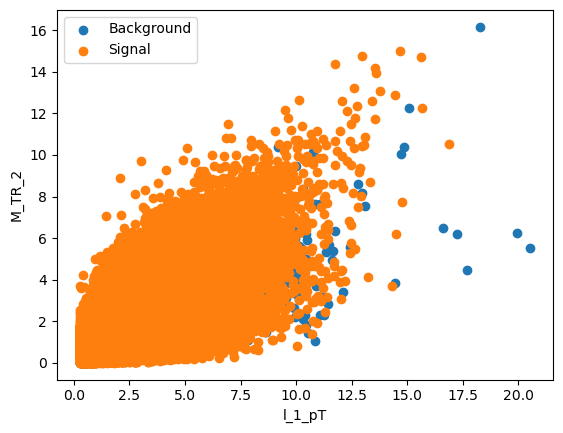

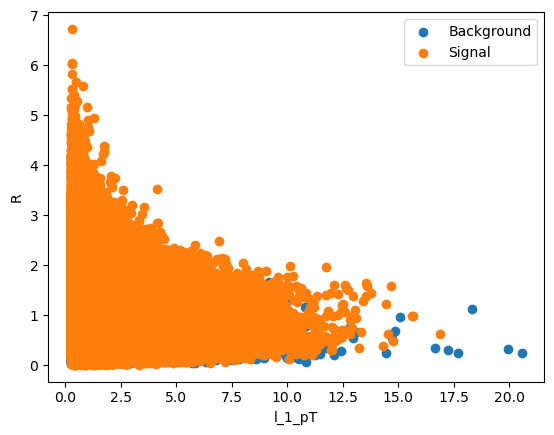

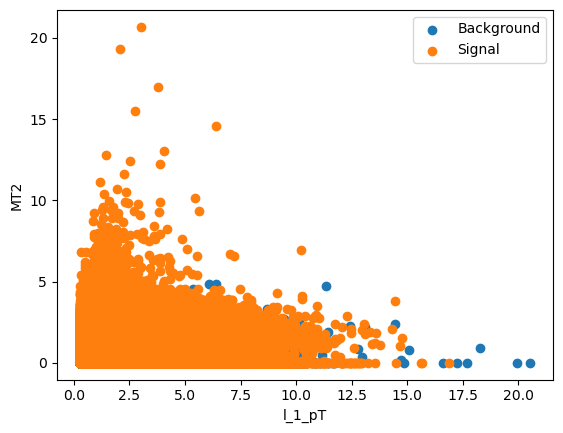

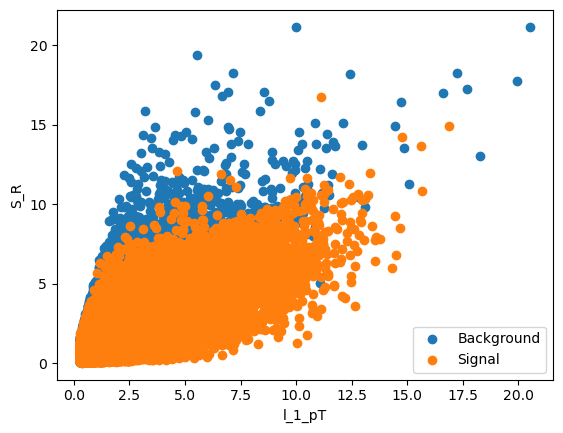

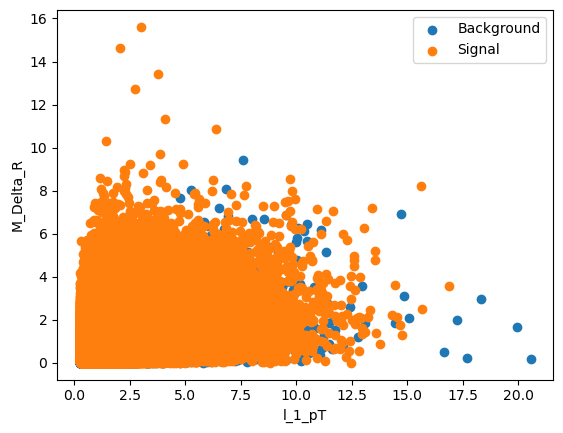

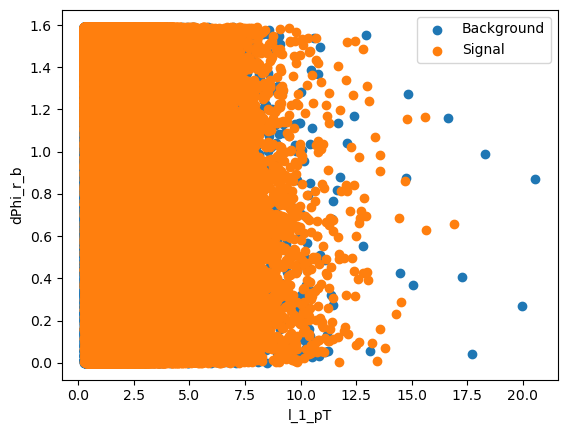

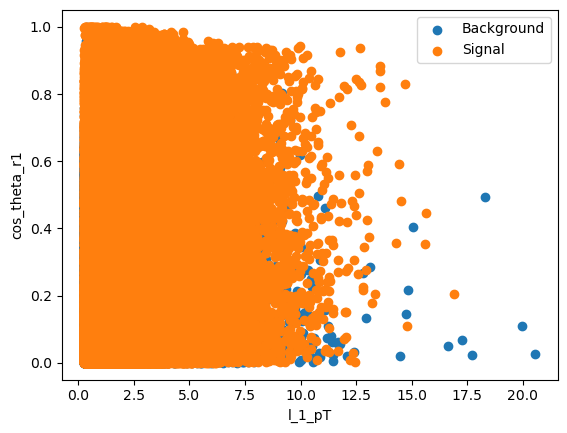

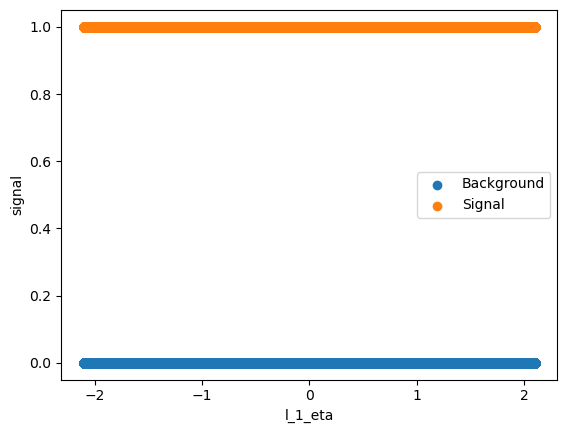

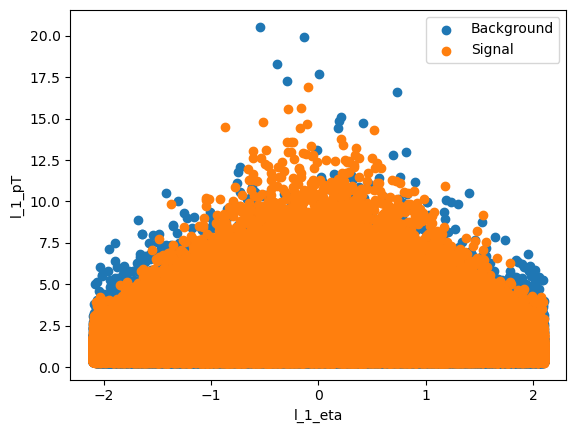

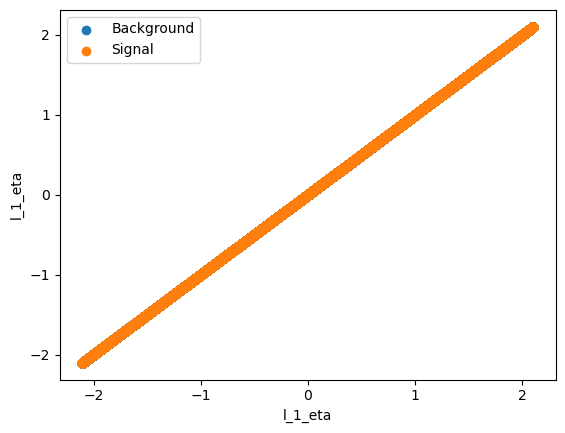

/Users/alielmasry/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


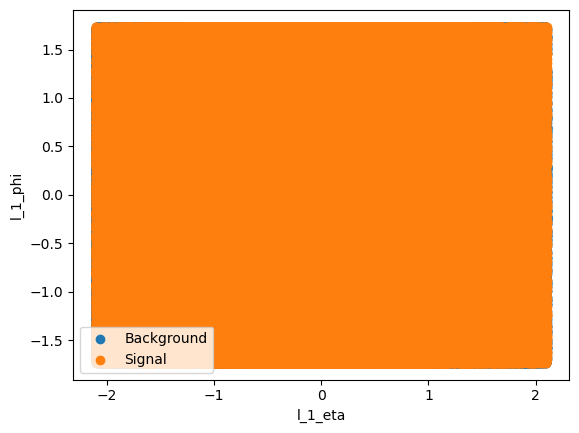

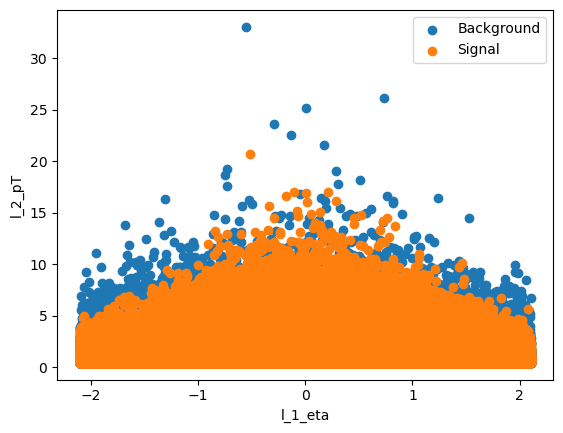

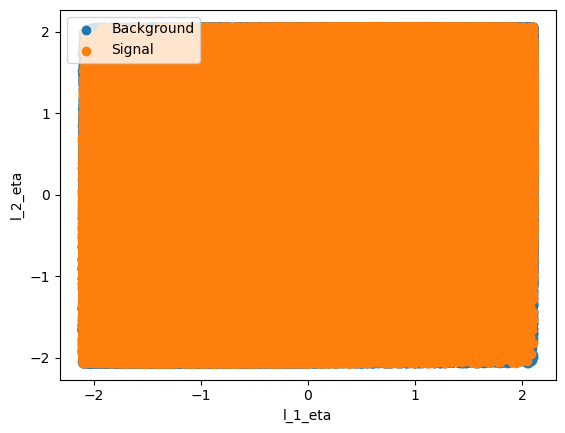

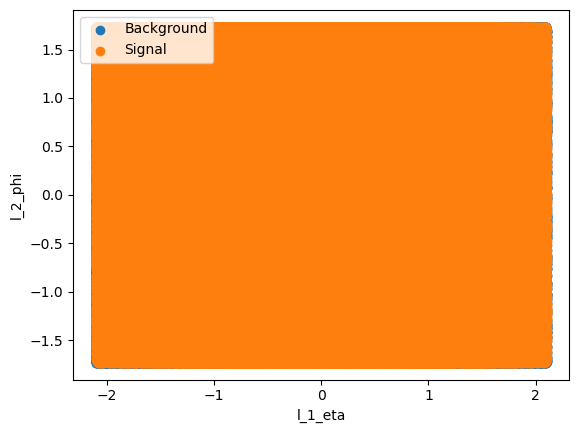

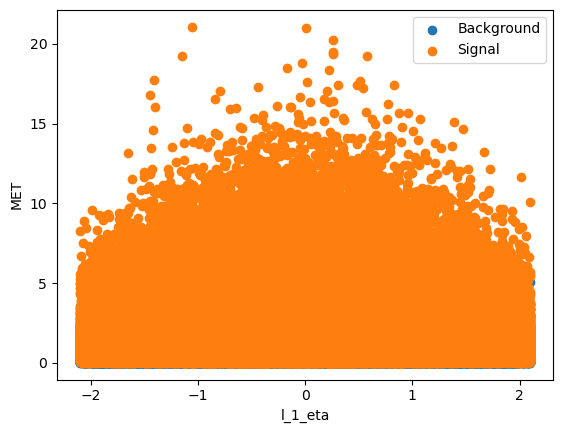

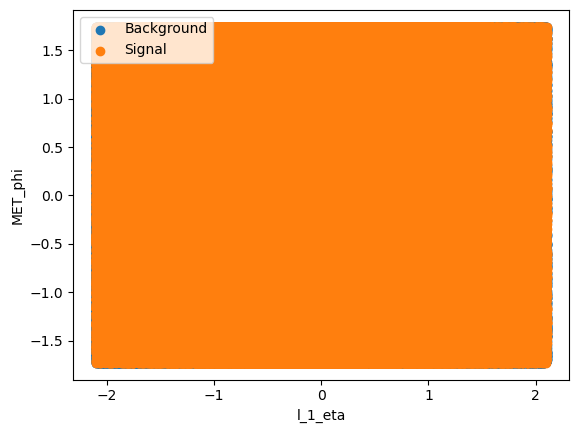

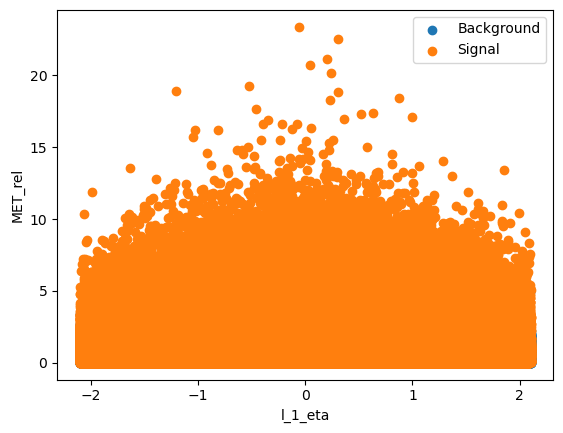

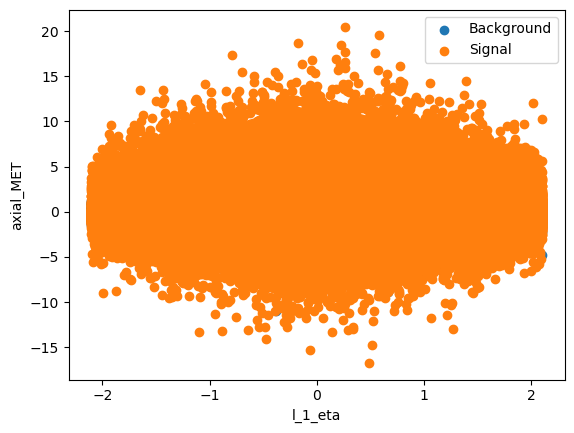

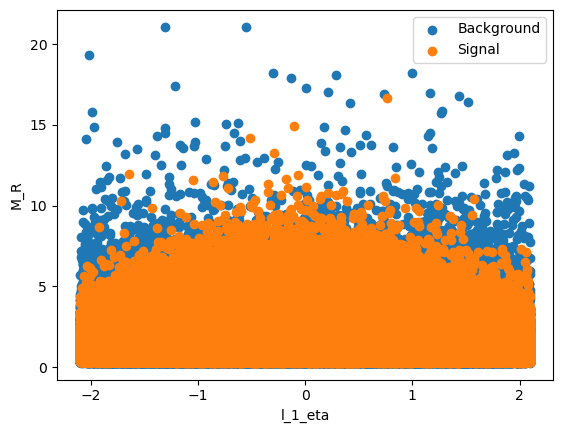

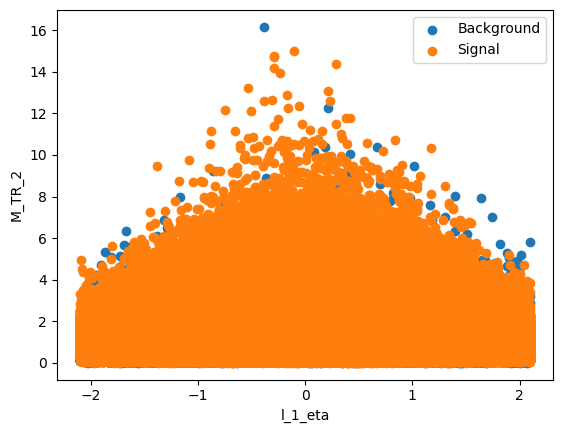

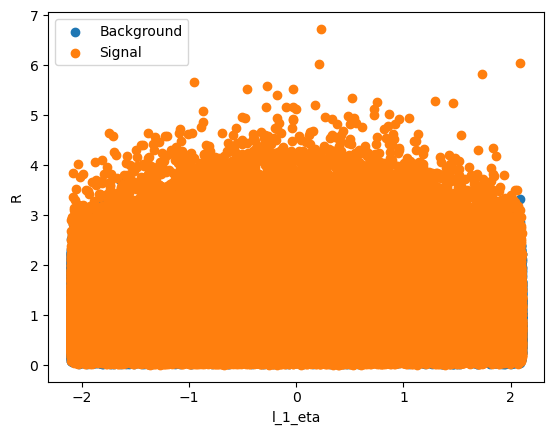

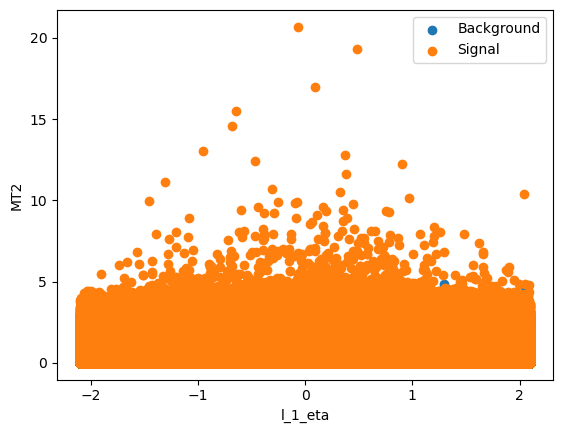

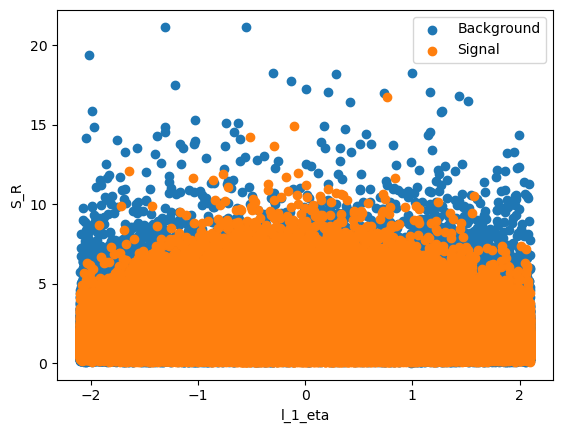

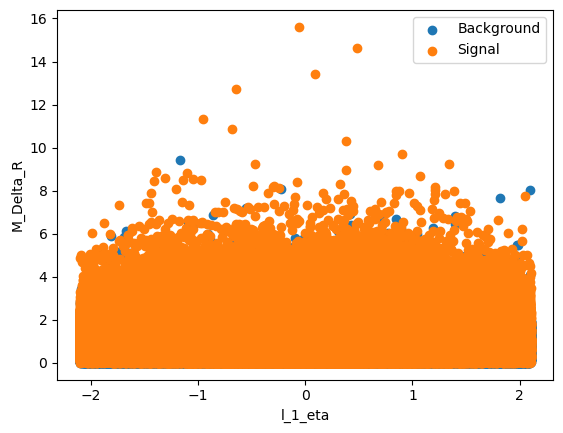

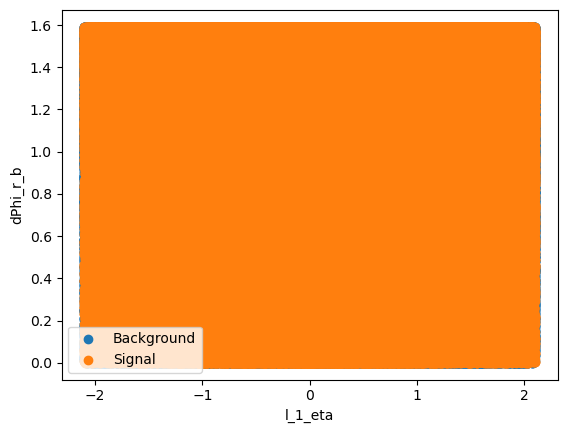

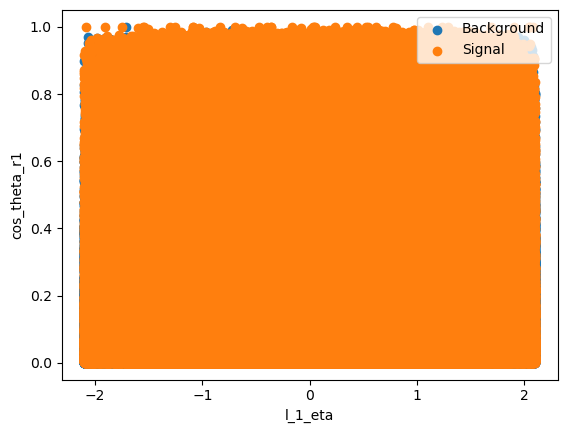

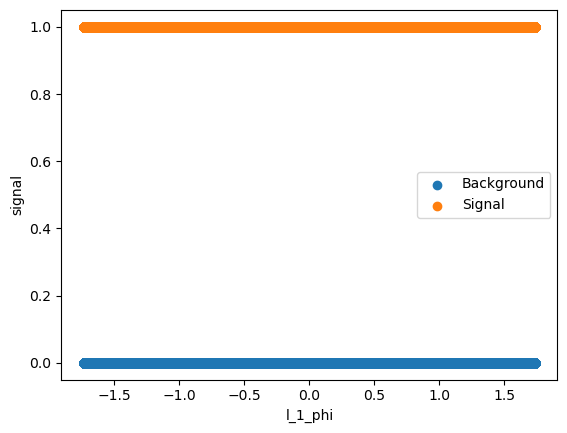

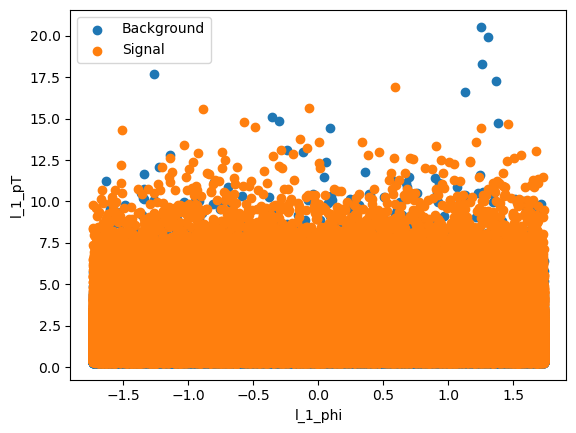

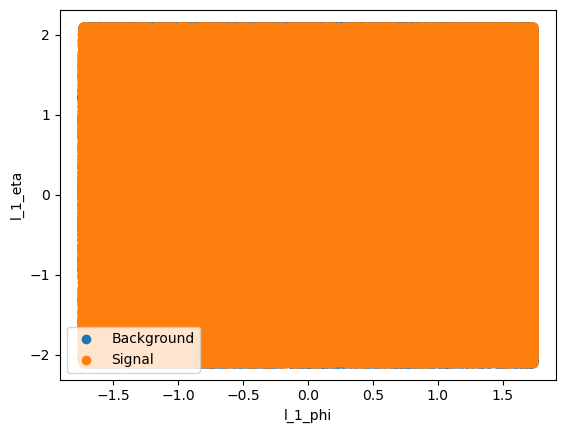

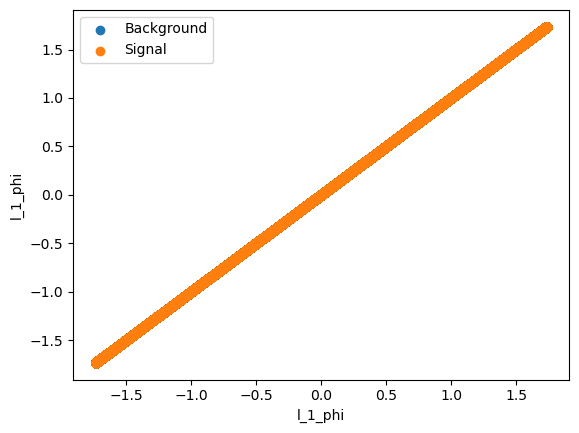

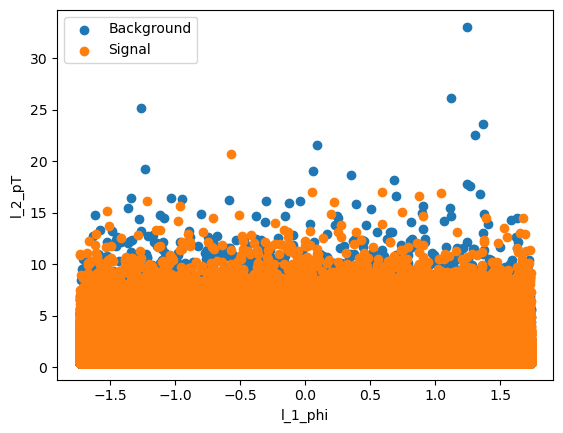

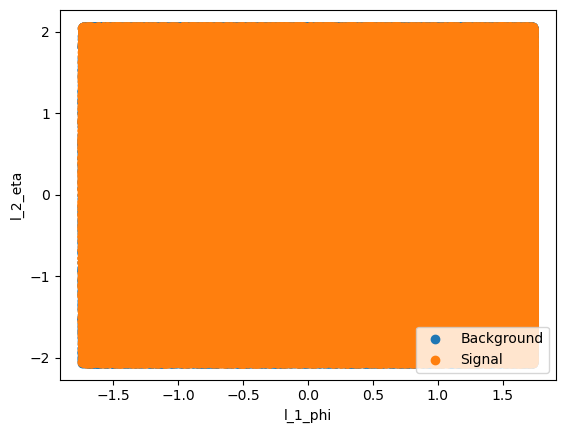

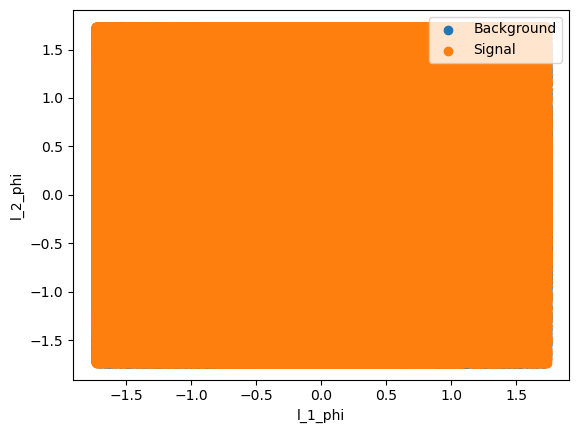

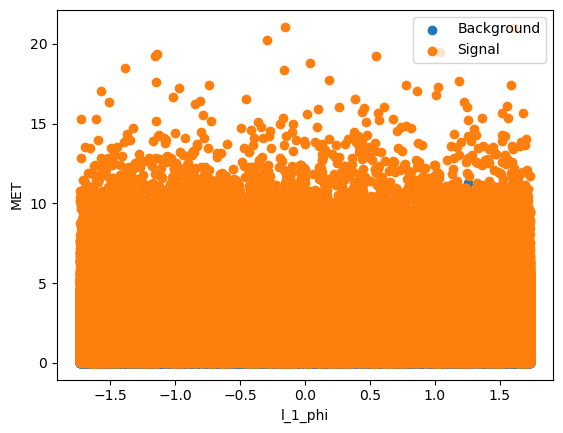

In [ ]:
###Part A:


selection_dict={"Background":df["signal"]==0.,"Signal":df["signal"]!=0}

def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()
        
for x_var_name in df.columns:
    for y_var_name in df.columns:
        compare_scatter(df,x_var_name,y_var_name,selection_dict)
        plt.show()

Hello 0
Goodbye 0
Goodbye 1
Goodbye 2
Goodbye 3
Goodbye 4
Hello 1
Goodbye 0
Goodbye 1
Goodbye 2
Goodbye 3
Goodbye 4
Hello 2
Goodbye 0
Goodbye 1
Goodbye 2
Goodbye 3
Goodbye 4
Hello 3
Goodbye 0
Goodbye 1
Goodbye 2
Goodbye 3
Goodbye 4
Hello 4
Goodbye 0
Goodbye 1
Goodbye 2
Goodbye 3
Goodbye 4


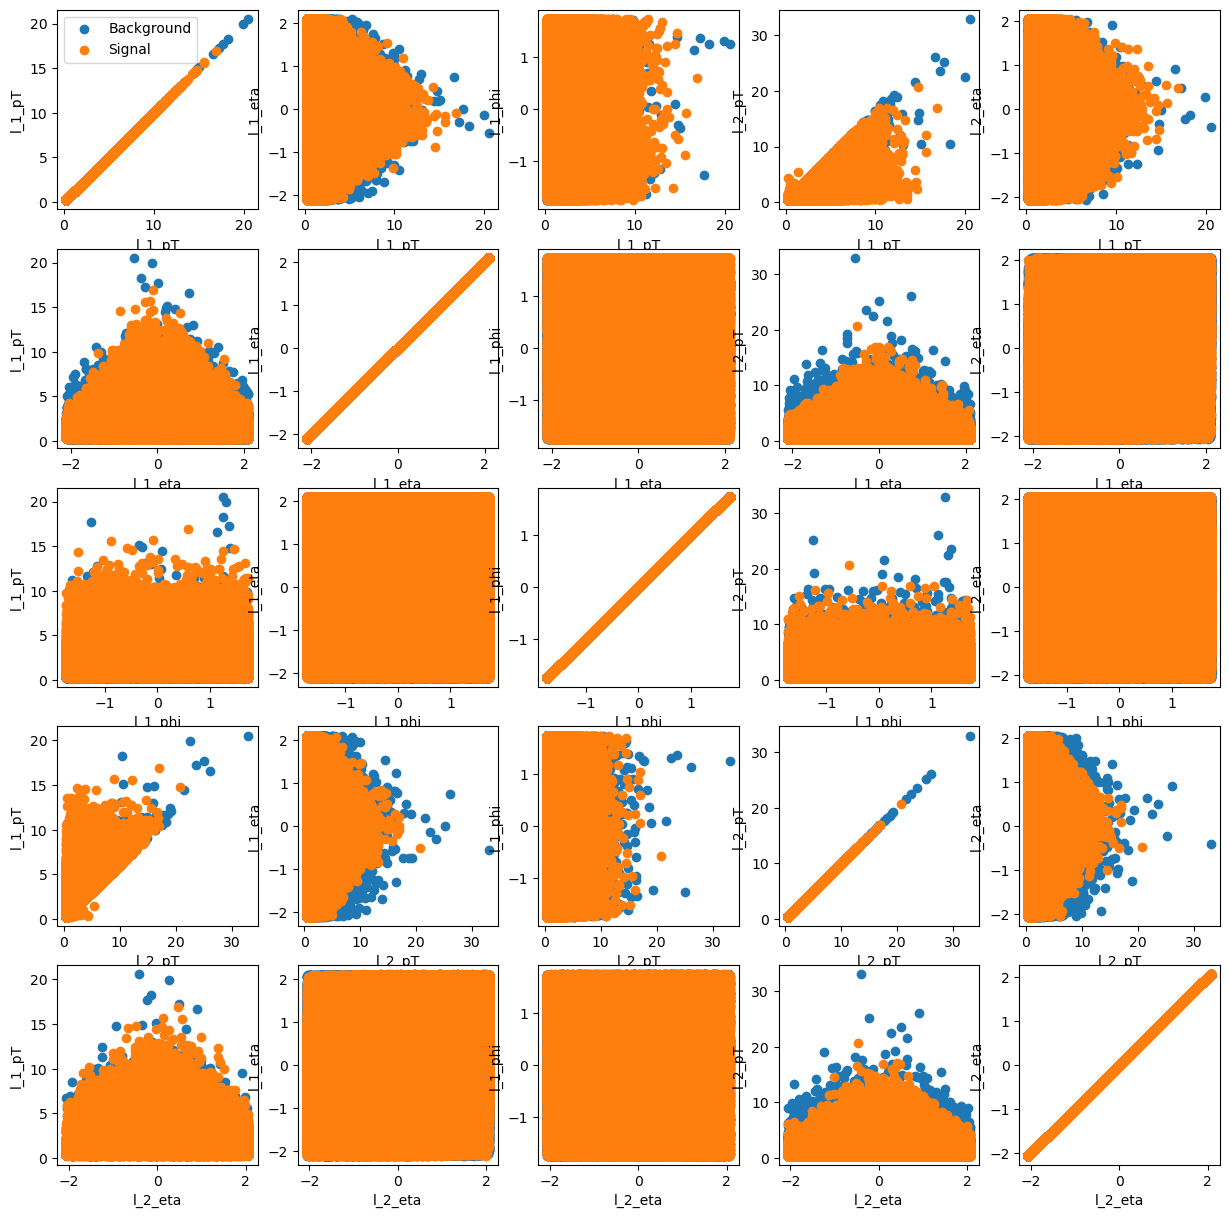

In [20]:
###Part B

columns = df.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    print("Hello", i)

    for j,y_var_name in enumerate(columns):
        print("Goodbye", j)
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)
        
###I wasn't entirely sure it was running so I used print, but you can ignore it

In [ ]:
###Part C

#The observables that are clearly seperated in the first graphs, such as l_1_eta or l_1_pT

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
import tabulate

In [24]:
##Part B
# Extract low-level features
low_level_features = df[RawNames].values

# Extract high-level features
high_level_features = df[FeatureNames].values

# Compute covariance and correlation matrices for low-level features
covariance_low = np.cov(low_level_features, rowvar=False)
correlation_low = np.corrcoef(low_level_features, rowvar=False)

# Compute covariance and correlation matrices for high-level features
covariance_high = np.cov(high_level_features, rowvar=False)
correlation_high = np.corrcoef(high_level_features, rowvar=False)

In [32]:
##Part C
from tabulate import tabulate

column_headers = ['Variable'] + VarNames[1:]

# Format covariance matrices
covariance_low_table = tabulate(covariance_low, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")
covariance_high_table = tabulate(covariance_high, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")

# Format correlation matrices
correlation_low_table = tabulate(correlation_low, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")
correlation_high_table = tabulate(correlation_high, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")

# Print the tables
print("Covariance Matrix (Low-level Features):")
print(covariance_low_table)
print("\nCorrelation Matrix (Low-level Features):")
print(correlation_low_table)
print("\nCovariance Matrix (High-level Features):")
print(covariance_high_table)
print("\nCorrelation Matrix (High-level Features):")
print(correlation_high_table)

Covariance Matrix (Low-level Features):
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|  Variable  |  l_1_pT  |  l_1_eta  |  l_1_phi  |  l_2_pT  |  l_2_eta  |  l_2_phi  |   MET   |
+============+==========+===========+===========+==========+===========+===========+=========+
|   0.4724   | -0.0003  |  -0.0002  |  0.3079   | -0.0003  |  0.0002   |  0.2310   | -0.0007 |
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|  -0.0003   |  1.0062  |  0.0003   |  -0.0004  |  0.4059  |  0.0003   |  -0.0006  | -0.0005 |
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|  -0.0002   |  0.0003  |  1.0033   |  -0.0001  |  0.0006  |  -0.2681  |  0.0012   | -0.1842 |
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|   0.3079   | -0.0004  |  -0.0001  |  0.4280   | -0.0005  |  0.0001   |  0.0797   | -0.0014 |
+---------

In [35]:
##Part d

def compute_covariance_correlation(dataset, var_names, raw_names, feature_names):
    signal_events = dataset[dataset['signal'] == 1]
    background_events = dataset[dataset['signal'] == 0]

    low_level_features = dataset[raw_names].values
    high_level_features = dataset[feature_names].values

    covariance_low = np.cov(low_level_features, rowvar=False)
    covariance_high = np.cov(high_level_features, rowvar=False)

    correlation_low = np.corrcoef(low_level_features, rowvar=False)
    correlation_high = np.corrcoef(high_level_features, rowvar=False)

    column_headers = ['Variable'] + var_names[1:]

    covariance_low_table = tabulate(covariance_low, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")
    covariance_high_table = tabulate(covariance_high, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")

    correlation_low_table = tabulate(correlation_low, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")
    correlation_high_table = tabulate(correlation_high, headers=column_headers, tablefmt='grid', numalign='center', stralign='center', floatfmt=".4f")

    print("Covariance Matrix (Low-level Features):")
    print(covariance_low_table)
    print("\nCorrelation Matrix (Low-level Features):")
    print(correlation_low_table)
    print("\nCovariance Matrix (High-level Features):")
    print(covariance_high_table)
    print("\nCorrelation Matrix (High-level Features):")
    print(correlation_high_table)
    
compute_covariance_correlation(dataset=df, var_names=VarNames, raw_names=RawNames, feature_names=FeatureNames)

Covariance Matrix (Low-level Features):
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|  Variable  |  l_1_pT  |  l_1_eta  |  l_1_phi  |  l_2_pT  |  l_2_eta  |  l_2_phi  |   MET   |
+============+==========+===========+===========+==========+===========+===========+=========+
|   0.4724   | -0.0003  |  -0.0002  |  0.3079   | -0.0003  |  0.0002   |  0.2310   | -0.0007 |
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|  -0.0003   |  1.0062  |  0.0003   |  -0.0004  |  0.4059  |  0.0003   |  -0.0006  | -0.0005 |
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|  -0.0002   |  0.0003  |  1.0033   |  -0.0001  |  0.0006  |  -0.2681  |  0.0012   | -0.1842 |
+------------+----------+-----------+-----------+----------+-----------+-----------+---------+
|   0.3079   | -0.0004  |  -0.0001  |  0.4280   | -0.0005  |  0.0001   |  0.0797   | -0.0014 |
+---------

In [37]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [ ]:
##Part A

##I think the first two criteria are best because they give
##the highest significance values in different scenarios

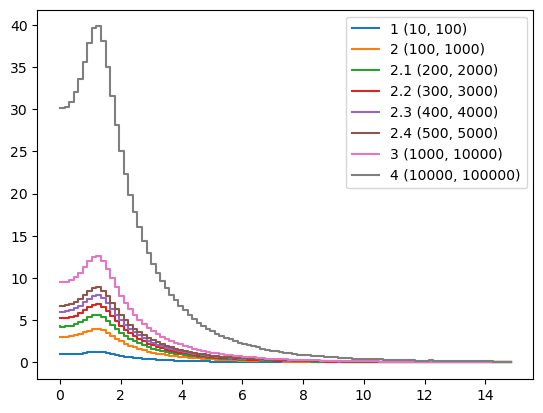

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
2.1,200,2000,0.363213,0.0469801,72.6426,93.9601,5.62795,1.35029,9
2.2,300,3000,0.363213,0.0469801,108.964,140.94,6.8928,1.35029,9
2.3,400,4000,0.363213,0.0469801,145.285,187.92,7.95912,1.35029,9
2.4,500,5000,0.363213,0.0469801,181.606,234.9,8.89857,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


In [38]:
###Part B

# Function to compute cumulative rates
def compute_rate(d, bins=100):
    # Compute histograms for the data
    hist, bins_ = np.histogram(d, bins=bins, density=True)
    # Compute the cumulative rates
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1] - bins_[0])
    return R, bins_

# Function to compare significance between signal and background
def compare_significance(df_sig, df_bkg, obs_name, scenarios, bins=100, log=False):
    # Compute cumulative rates for signal and background
    TPR, bins_sig = compute_rate(df_sig[obs_name], bins=bins)
    FPR, bins_sig = compute_rate(df_bkg[obs_name], bins=bins_sig)
    
    # Dictionary to store maximum significance values for each scenario
    max_sigs = dict()
    # List to store data for the table
    table = list()
    
    # Loop through each scenario
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        # Calculate expected signal and background rates
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR
        
        # Calculate significance
        sig = n_sig_expected_prime / np.sqrt(n_sig_expected_prime + n_bkg_expected_prime)
        
        # Find the maximum significance value
        max_i = np.argmax(sig)
        max_sigs[name] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i])
        table.append((name, n_sig_expected, n_bkg_expected, TPR[max_i], FPR[max_i], n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i], max_i))
        
        # Plot the significance
        plt.step(bins_sig[:-1], sig, label=name + " " + str((n_sig_expected, n_bkg_expected)))
    
    # Set logarithmic scale if log=True
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    # Display the results in a table
    display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Name", 'N sig', 'N bkg', "TPR", "FPR", "N sig'", "N bkg'", 'sig', 'x_c', "bin i"])))
    
    return max_sigs

scenarios = {"1": (10, 100), 
             "2": (100, 1000),
             "2.1": (200, 2000),
             "2.2": (300, 3000),
             "2.3": (400, 4000),
             "2.4": (500, 5000),
             "3": (1000, 10000),
             "4": (10000, 100000)}

_ = compare_significance(df_sig, df_bkg, "M_TR_2", scenarios)

MET


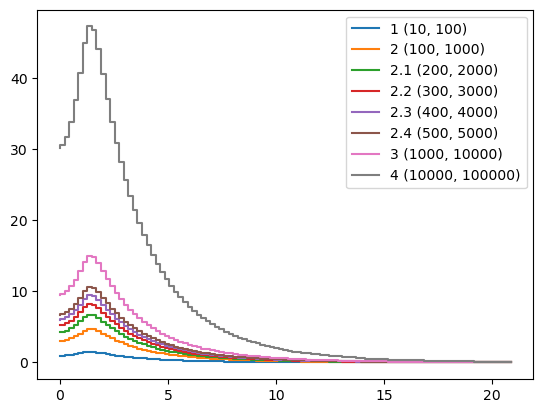

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
2.1,200,2000,0.349463,0.0198365,69.8926,39.673,6.6772,1.47506,7
2.2,300,3000,0.349463,0.0198365,104.839,59.5095,8.17786,1.47506,7
2.3,400,4000,0.349463,0.0198365,139.785,79.346,9.44298,1.47506,7
2.4,500,5000,0.349463,0.0198365,174.732,99.1825,10.5576,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


MET_phi


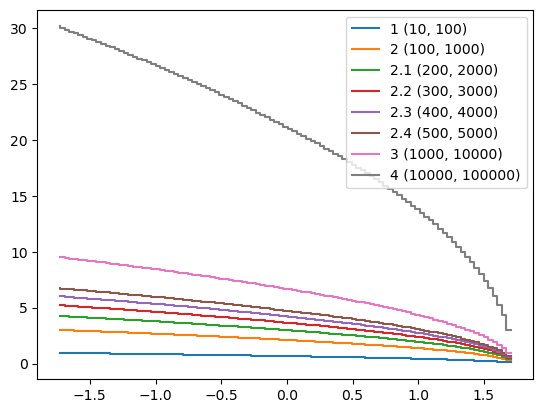

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72712,0
2,100,1000,1,1,100,1000,3.01511,-1.72712,0
2.1,200,2000,1,1,200,2000,4.26401,-1.72712,0
2.2,300,3000,1,1,300,3000,5.22233,-1.72712,0
2.3,400,4000,1,1,400,4000,6.03023,-1.72712,0
2.4,500,5000,1,1,500,5000,6.742,-1.72712,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72712,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72712,0


MET_rel


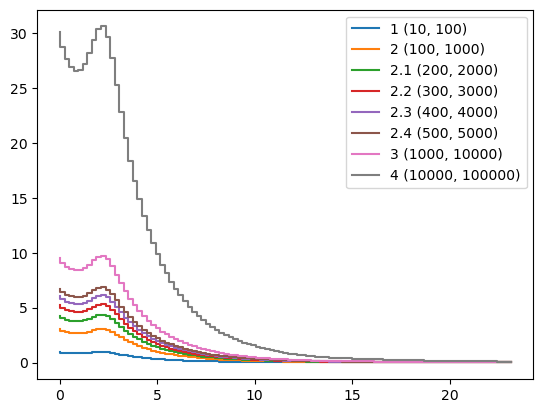

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.142159,0.00731554,1.42159,0.731554,0.96881,2.33864,10
2,100,1000,0.142159,0.00731554,14.2159,7.31554,3.06365,2.33864,10
2.1,200,2000,0.142159,0.00731554,28.4319,14.6311,4.33265,2.33864,10
2.2,300,3000,0.142159,0.00731554,42.6478,21.9466,5.30639,2.33864,10
2.3,400,4000,0.142159,0.00731554,56.8637,29.2621,6.12729,2.33864,10
2.4,500,5000,0.142159,0.00731554,71.0797,36.5777,6.85052,2.33864,10
3,1000,10000,0.142159,0.00731554,142.159,73.1554,9.6881,2.33864,10
4,10000,100000,0.142159,0.00731554,1421.59,731.554,30.6365,2.33864,10


axial_MET


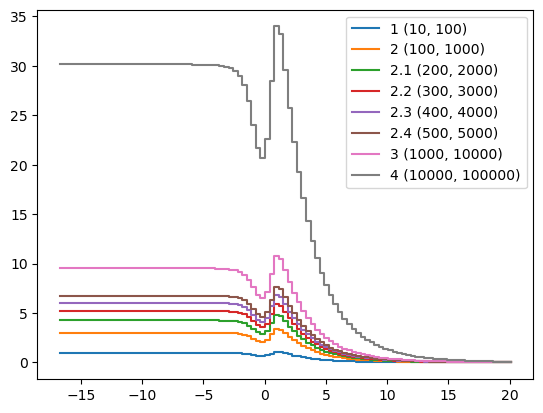

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.160196,0.00620536,1.60196,0.620536,1.07456,1.1405,48
2,100,1000,0.160196,0.00620536,16.0196,6.20536,3.39806,1.1405,48
2.1,200,2000,0.160196,0.00620536,32.0391,12.4107,4.80558,1.1405,48
2.2,300,3000,0.160196,0.00620536,48.0587,18.6161,5.88561,1.1405,48
2.3,400,4000,0.160196,0.00620536,64.0783,24.8214,6.79611,1.1405,48
2.4,500,5000,0.160196,0.00620536,80.0978,31.0268,7.59829,1.1405,48
3,1000,10000,0.160196,0.00620536,160.196,62.0536,10.7456,1.1405,48
4,10000,100000,0.160196,0.00620536,1601.96,620.536,33.9806,1.1405,48


M_R


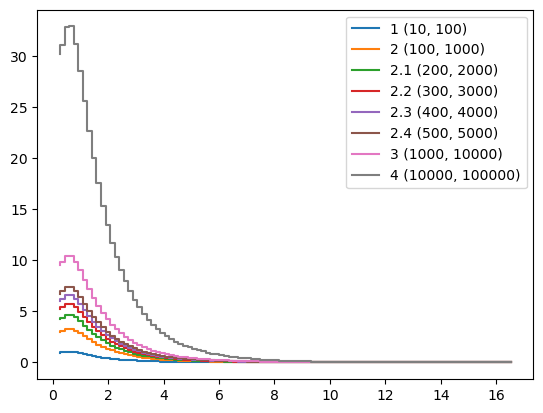

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.731022,0.421495,7.31022,42.1495,1.03945,0.76074,3
2,100,1000,0.731022,0.421495,73.1022,421.495,3.28704,0.76074,3
2.1,200,2000,0.731022,0.421495,146.204,842.99,4.64858,0.76074,3
2.2,300,3000,0.731022,0.421495,219.307,1264.48,5.69332,0.76074,3
2.3,400,4000,0.731022,0.421495,292.409,1685.98,6.57408,0.76074,3
2.4,500,5000,0.731022,0.421495,365.511,2107.47,7.35004,0.76074,3
3,1000,10000,0.731022,0.421495,731.022,4214.95,10.3945,0.76074,3
4,10000,100000,0.731022,0.421495,7310.22,42149.5,32.8704,0.76074,3


M_TR_2


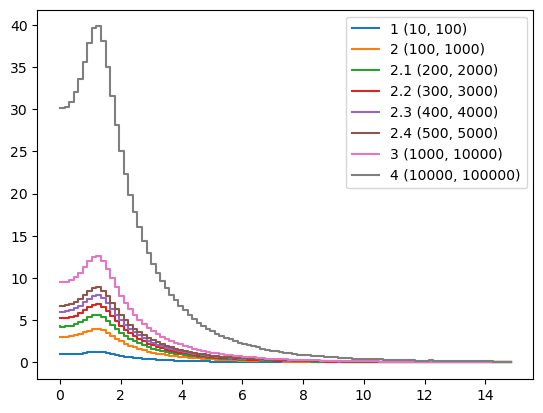

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
2.1,200,2000,0.363213,0.0469801,72.6426,93.9601,5.62795,1.35029,9
2.2,300,3000,0.363213,0.0469801,108.964,140.94,6.8928,1.35029,9
2.3,400,4000,0.363213,0.0469801,145.285,187.92,7.95912,1.35029,9
2.4,500,5000,0.363213,0.0469801,181.606,234.9,8.89857,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


R


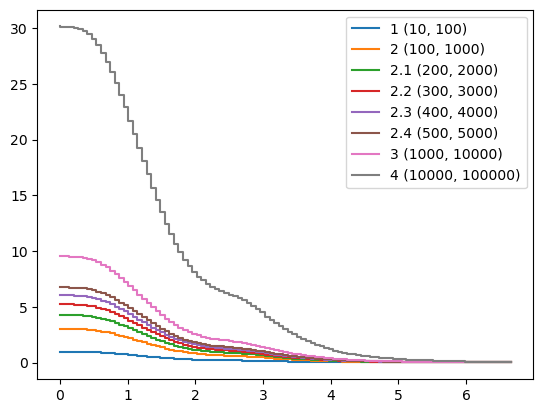

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00204808,0
2,100,1000,1,1,100,1000,3.01511,0.00204808,0
2.1,200,2000,1,1,200,2000,4.26401,0.00204808,0
2.2,300,3000,1,1,300,3000,5.22233,0.00204808,0
2.3,400,4000,1,1,400,4000,6.03023,0.00204808,0
2.4,500,5000,1,1,500,5000,6.742,0.00204808,0
3,1000,10000,1,1,1000,10000,9.53463,0.00204808,0
4,10000,100000,1,1,10000,100000,30.1511,0.00204808,0


MT2


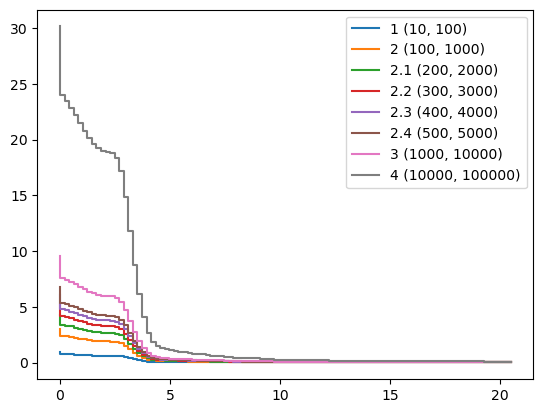

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
2.1,200,2000,1,1,200,2000,4.26401,0,0
2.2,300,3000,1,1,300,3000,5.22233,0,0
2.3,400,4000,1,1,400,4000,6.03023,0,0
2.4,500,5000,1,1,500,5000,6.742,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


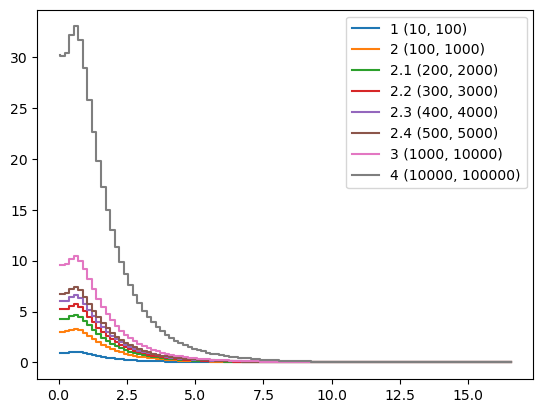

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.777207,0.477283,7.77207,47.7283,1.04325,0.719131,4
2,100,1000,0.777207,0.477283,77.7207,477.283,3.29905,0.719131,4
2.1,200,2000,0.777207,0.477283,155.441,954.566,4.66556,0.719131,4
2.2,300,3000,0.777207,0.477283,233.162,1431.85,5.71412,0.719131,4
2.3,400,4000,0.777207,0.477283,310.883,1909.13,6.5981,0.719131,4
2.4,500,5000,0.777207,0.477283,388.604,2386.41,7.3769,0.719131,4
3,1000,10000,0.777207,0.477283,777.207,4772.83,10.4325,0.719131,4
4,10000,100000,0.777207,0.477283,7772.07,47728.3,32.9905,0.719131,4


M_Delta_R


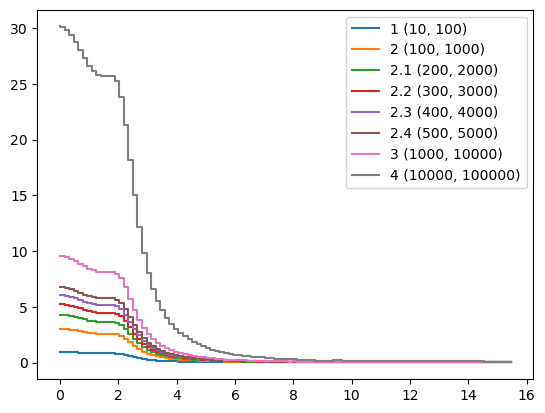

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
2.1,200,2000,1,1,200,2000,4.26401,0.00445562,0
2.2,300,3000,1,1,300,3000,5.22233,0.00445562,0
2.3,400,4000,1,1,400,4000,6.03023,0.00445562,0
2.4,500,5000,1,1,500,5000,6.742,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


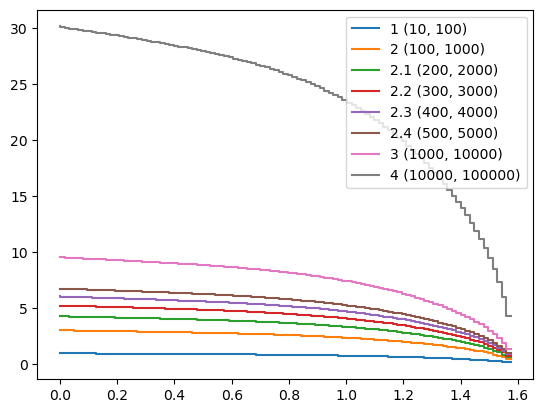

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,2.45273e-06,0
2,100,1000,1,1,100,1000,3.01511,2.45273e-06,0
2.1,200,2000,1,1,200,2000,4.26401,2.45273e-06,0
2.2,300,3000,1,1,300,3000,5.22233,2.45273e-06,0
2.3,400,4000,1,1,400,4000,6.03023,2.45273e-06,0
2.4,500,5000,1,1,500,5000,6.742,2.45273e-06,0
3,1000,10000,1,1,1000,10000,9.53463,2.45273e-06,0
4,10000,100000,1,1,10000,100000,30.1511,2.45273e-06,0


cos_theta_r1


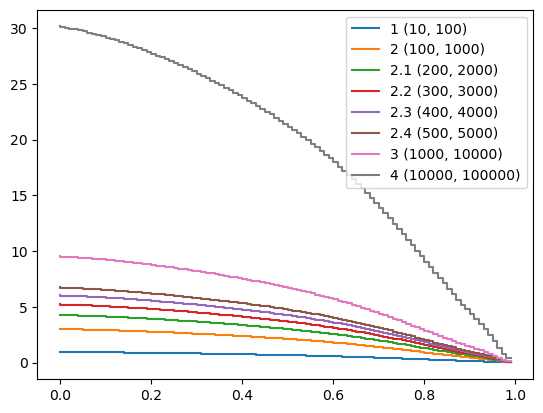

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1.50257e-07,0
2,100,1000,1,1,100,1000,3.01511,1.50257e-07,0
2.1,200,2000,1,1,200,2000,4.26401,1.50257e-07,0
2.2,300,3000,1,1,300,3000,5.22233,1.50257e-07,0
2.3,400,4000,1,1,400,4000,6.03023,1.50257e-07,0
2.4,500,5000,1,1,500,5000,6.742,1.50257e-07,0
3,1000,10000,1,1,1000,10000,9.53463,1.50257e-07,0
4,10000,100000,1,1,10000,100000,30.1511,1.50257e-07,0


In [22]:
##Part B

my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)

In [23]:
##Part C

df_sig_1 = df_sig[df_sig["M_TR_2"]>1.35029]
df_bkg_1 = df_bkg[df_bkg["M_TR_2"]>1.35029]


eff_s = df_sig_1.shape[0]/df_sig.shape[0]
eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]

scenarios_1 =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))
scenarios_1

{'1': (3.632149633691708, 4.698077888099321),
 '2': (36.32149633691708, 46.980778880993206),
 '2.1': (72.64299267383416, 93.96155776198641),
 '2.2': (108.96448901075124, 140.94233664297963),
 '2.3': (145.28598534766832, 187.92311552397283),
 '2.4': (181.6074816845854, 234.90389440496605),
 '3': (363.2149633691708, 469.8077888099321),
 '4': (3632.149633691708, 4698.077888099321)}

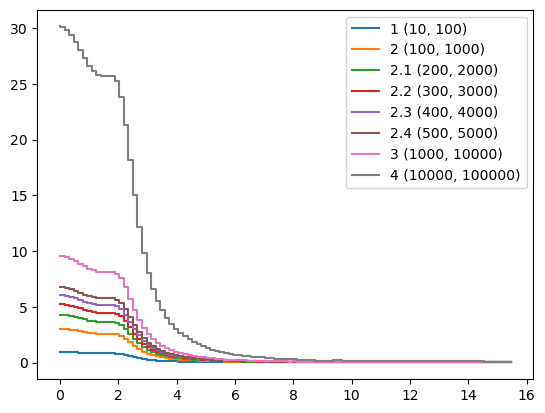

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
2.1,200,2000,1,1,200,2000,4.26401,0.00445562,0
2.2,300,3000,1,1,300,3000,5.22233,0.00445562,0
2.3,400,4000,1,1,400,4000,6.03023,0.00445562,0
2.4,500,5000,1,1,500,5000,6.742,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


In [24]:
_=compare_significance(df_sig,df_bkg,"M_Delta_R",scenarios)

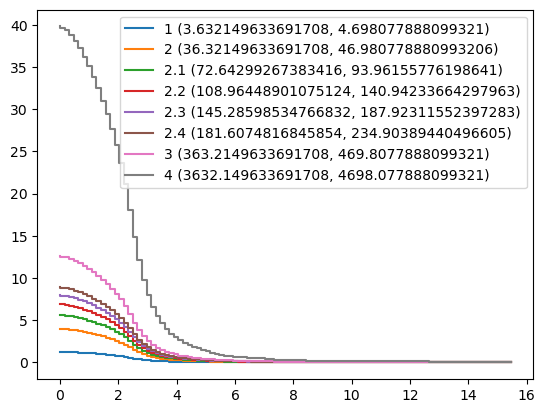

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,3.63215,4.69808,1,1,3.63215,4.69808,1.25845,0.00448977,0
2,36.3215,46.9808,1,1,36.3215,46.9808,3.97956,0.00448977,0
2.1,72.643,93.9616,1,1,72.643,93.9616,5.62795,0.00448977,0
2.2,108.964,140.942,1,1,108.964,140.942,6.8928,0.00448977,0
2.3,145.286,187.923,1,1,145.286,187.923,7.95912,0.00448977,0
2.4,181.607,234.904,1,1,181.607,234.904,8.89857,0.00448977,0
3,363.215,469.808,1,1,363.215,469.808,12.5845,0.00448977,0
4,3632.15,4698.08,1,1,3632.15,4698.08,39.7956,0.00448977,0


In [25]:
_=compare_significance(df_sig_1,df_bkg_1,"M_Delta_R",scenarios_1)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [39]:
##Part A
##There is no 3c?
scenario_observables = {
    "1": ['MET', 'MET_phi', 'M_TR_2'],
    "2": ['MET', 'M_TR_2', 'R'],
    "2.1": ['MET', 'M_TR_2', 'R'],
    "2.2": ['MET', 'M_TR_2', 'R']
}

# Choose appropriate xc values based on significance plots (these are just placeholders)
xc_values = {
    "1": 0.2,
    "2": 0.4,
    "2.1": 0.5,
    "2.2": 0.6
}

In [44]:
df_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,1.0,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,1.0,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.0,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [ ]:
##No 3c

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



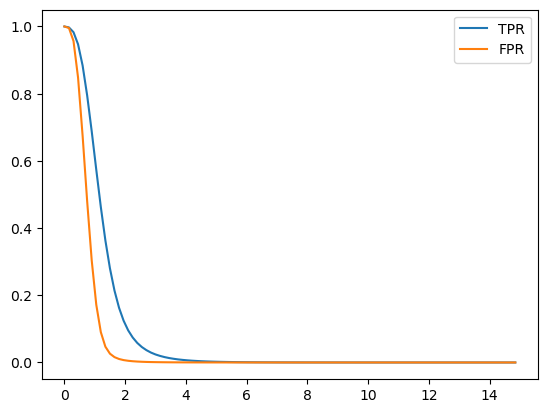

In [31]:
##Part A

def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_
TPR,bins=compute_rate(df_sig["M_TR_2"])
FPR,bins=compute_rate(df_bkg["M_TR_2"],bins=bins)

plt.plot(bins[:-1],TPR,label="TPR")
plt.plot(bins[:-1],FPR,label="FPR")
plt.legend()

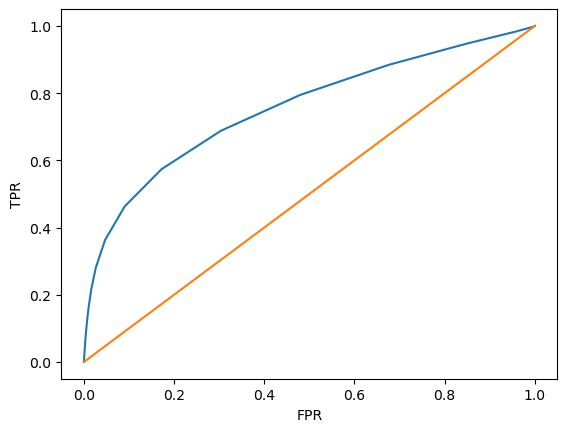

In [32]:
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1])

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [26]:
###Part A
df_sig = df[df.signal==1]
df_bkg = df[df.signal!=1]

df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


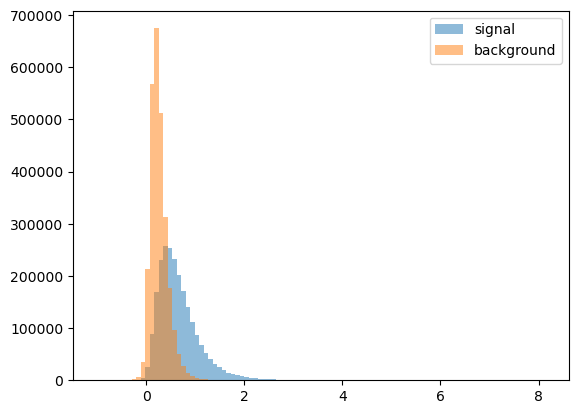

In [27]:
###Part A

m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta=np.matrix(m_s-m_b).transpose()

S_B= delta*delta.transpose()

delta_s=np.matrix(df_sig_0-m_s).transpose()

S_W_s= delta_s*delta_s.transpose()

delta_b=np.matrix(df_bkg_0-m_b).transpose()

S_W_b= delta_b*delta_b.transpose()

S_W=S_W_s+S_W_b

S_W_inv = np.linalg.inv(S_W)

w = S_W_inv * np.matrix(m_b - m_s).transpose()

w_1 = w / sum(w)

output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1

h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()


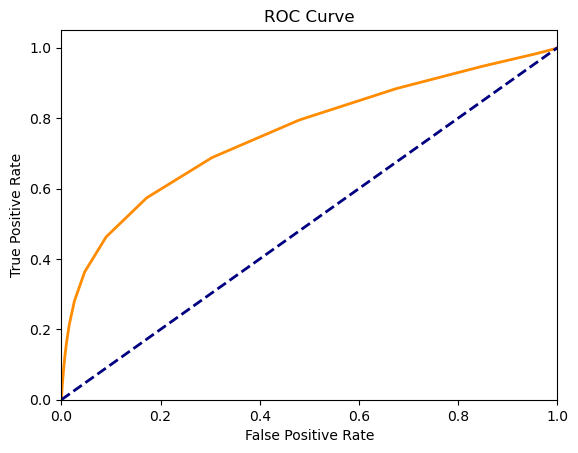

In [33]:
plt.plot(FPR, TPR, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()